# Homework 2

- 63340500040 นายพันธุ์ธัช ลิขิตบัณฑูร
- 63340500048 นายภูฟ้า บุญเชื้อตรง

## Chapter 1

### Simple Bayes Classifier

### 1.2 Plot the posteriors values of the two classes on the same axis. Using the likelihood ratio test, what is the decision boundary for this classifier? Assume equal prior probabilities. What happen with x < 2 (Happy cat or Sad Cat)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def posteriors(data, mean, variance, prior=1):
    sd = np.sqrt(variance)
    p = (1/((np.sqrt(2*np.pi))*sd))*(np.exp(-((data-mean)**2)/(2*sd**2)))
    return p*prior

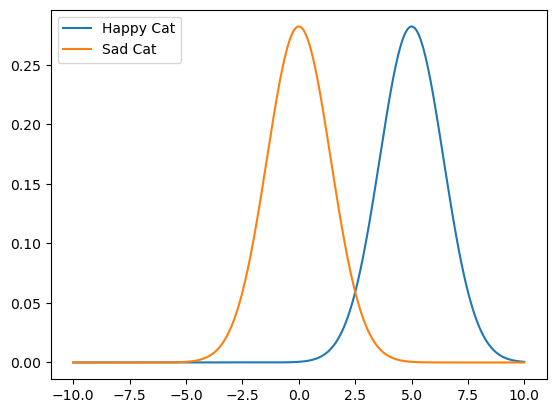

Probability density at x=2 for Happy Cat: 0.029732572305907357
Probability density at x=2 for Sad Cat: 0.1037768743551487


In [3]:
x_axis = np.arange(-10, 10, 0.01) 
  
# 1 represent happy cat / 2 represent sad cat
mean1 = 5
var1 = 2

mean2 = 0
var2 = 2

y1 = [posteriors(i,mean1,var1) for i in x_axis]
y2 = [posteriors(i,mean2,var2) for i in x_axis]

plt.plot(x_axis, y1, label="Happy Cat") 
plt.plot(x_axis, y2, label="Sad Cat") 
plt.legend()

plt.show() 

x = 2
y_happy_cat = posteriors(x, mean1, var1)
y_sad_cat = posteriors(x, mean2, var2)

print("Probability density at x=2 for Happy Cat:", y_happy_cat)
print("Probability density at x=2 for Sad Cat:", y_sad_cat)

Ans: เกิด decision boundary ที่ตำแหน่ง 2.5 และที่ตำแหน่ง X < 2 แมวจะเศร้า

### 1.3 What happen to the decision boundary if the cat is happy with a prior of 0.8? Plot the posteriors values of the two classes on the same axis. What happen with x < 2 (Happy cat or Sad Cat)

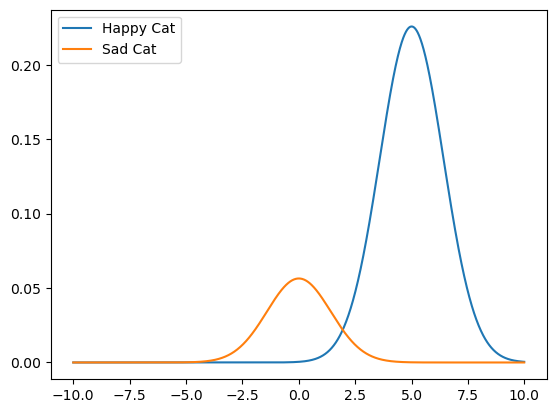

Probability density at x=2 for Happy Cat: 0.023786057844725886
Probability density at x=2 for Sad Cat: 0.020755374871029734


In [4]:
x_axis = np.arange(-10, 10, 0.01) 
  
# 1 represent happy cat / 2 represent sad cat
prior1 = 0.8
prior2 = 1 - prior1

mean1 = 5
var1 = 2

mean2 = 0
var2 = 2

y1 = [posteriors(i,mean1,var1,prior1) for i in x_axis]
y2 = [posteriors(i,mean2,var2,prior2) for i in x_axis]

plt.plot(x_axis, y1, label="Happy Cat") 
plt.plot(x_axis, y2, label="Sad Cat") 
plt.legend()

plt.show() 

x = 2
y_happy_cat = posteriors(x, mean1, var1,prior1)
y_sad_cat = posteriors(x, mean2, var2,prior2)

print("Probability density at x=2 for Happy Cat:", y_happy_cat)
print("Probability density at x=2 for Sad Cat:", y_sad_cat)

Ans: เกิด decision boundary ที่ตำแหน่งระหว่าง 0 - 2.5 และที่ตำแหน่ง X < 2 แมวจะมีความสุข

# Chapter 2

### Data cleaning

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.shape

(1470, 35)

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,2.072279,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,1.105828,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [11]:
df = df.drop(columns = "EmployeeNumber")

In [12]:
cat_cols = df.select_dtypes(include="object").columns.to_list() #or include="category"
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print('catagorical feature : ',cat_cols)
print('numerical feature : ',num_cols)

catagorical feature :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
numerical feature :  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


convert label and convert categorical to number
- Yes to 1
- No to 0

In [13]:
df.loc[df["Attrition"] == "No", "Attrition"] = 0.0
df.loc[df["Attrition"] == "Yes", "Attrition"] = 1.0

cat_cols = df.select_dtypes(include=['object']).columns.to_list()
print(cat_cols)
for col in cat_cols:
    df[col] = pd.Categorical(df[col]).codes

# replace -1 to NaN
df.replace(-1, np.nan, inplace=True)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


C:\Users\TUF\AppData\Local\Temp\ipykernel_12164\2878894371.py:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df[col] = pd.Categorical(df[col]).codes


In [14]:
# df.isnull().any()

In [15]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,2.0,NaN,NaN,1.0,NaN,1.0,1.0,2.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0,NaN,279.0,1.0,NaN,NaN,1.0,1.0,3.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,NaN,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0,1.0,1392.0,1.0,3.0,4.0,1.0,NaN,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0,2.0,591.0,1.0,2.0,1.0,3.0,1.0,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


Check label count

In [16]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Split data to train and test
- train 90 %
- test 10 %

In [17]:
randomstate = 42
# 1 is Yes / 2 is No
temp_y = df.loc[df['Attrition'] == 1] 
temp_n = df.loc[df['Attrition'] == 0] 

# Shuffle data frame
temp_y = temp_y.sample(frac = 1, random_state=randomstate)
temp_n = temp_n.sample(frac = 1, random_state=randomstate)

# Split to train and test
temp_y_train = temp_y[:int(0.9*len(temp_y))]
temp_y_test = temp_y[int(0.9*len(temp_y)):]

temp_n_train = temp_n[:int(0.9*len(temp_n))]
temp_n_test = temp_n[int(0.9*len(temp_n)):]

# Join data frame
train = pd.concat([temp_y_train, temp_n_train], axis=0, join='inner')
test = pd.concat([temp_y_test, temp_n_test], axis=0, join='inner')

# Shuffle data frame
train = train.sample(frac = 1, random_state=randomstate)
# test = test.sample(frac = 1, random_state=randomstate)

In [18]:
print('train data: ',len(train))
print('test data: ',len(test))


train data:  1322
test data:  148


In [19]:
test.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1339,NaN,1,2.0,391.0,1.0,7.0,NaN,1.0,NaN,4.0,...,1.0,80.0,NaN,NaN,2.0,3.0,NaN,0.0,0.0,0.0
2,37.0,1,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,NaN,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
357,21.0,1,1.0,NaN,2.0,1.0,1.0,5.0,1.0,NaN,...,3.0,80.0,0.0,3.0,3.0,3.0,3.0,2.0,NaN,2.0
892,19.0,1,0.0,NaN,NaN,10.0,3.0,3.0,1.0,1.0,...,2.0,NaN,0.0,1.0,NaN,4.0,1.0,NaN,NaN,0.0
791,35.0,1,2.0,1204.0,2.0,4.0,NaN,NaN,1.0,4.0,...,1.0,80.0,0.0,9.0,2.0,3.0,8.0,7.0,NaN,7.0


Histogram discretization

### 2.1. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

In [20]:
def plot_histogram(data, cols, bins = 10, out_cols = 'Attrition', subplot = False):
    data = data[~np.isnan(data[cols])] # remove NaN
    if cols == out_cols: # do not plot output
        return
    
    if subplot == False:
        plt.hist(data[cols], bins, color='skyblue', edgecolor='black')
        hist, bin_edge = np.histogram(data[cols], bins)
        zero_bins = np.sum(hist == 0)
        
        plt.title(cols)
        plt.xlabel('bins')
        plt.ylabel('Frequencies')

        plt.show()
        print(f"Number of zero bins in {cols}:", zero_bins)

    elif subplot == True:
        fig, ax = plt.subplots(nrows = 1, ncols = len(bins), figsize = (15,5))
        bin_count = []
        for i in range(len(bins)):
            ax[i].hist(data[cols], bins[i], color='skyblue', edgecolor='black')
            ax[i].set_title(f'bin = {bins[i]}')
        
            ax[i].set_xlabel('bins')
            
            hist, bin_edge = np.histogram(data[cols], bins[i])
            zero_bins = np.sum(hist == 0)
            bin_count.append(zero_bins)

        ax[0].set_ylabel('Frequencies')

        fig.suptitle(cols)
        plt.show()

        for i in range(len(bin_count)):
            print(f"Number of zero bins {bins[i]} in {cols}:", bin_count[i])

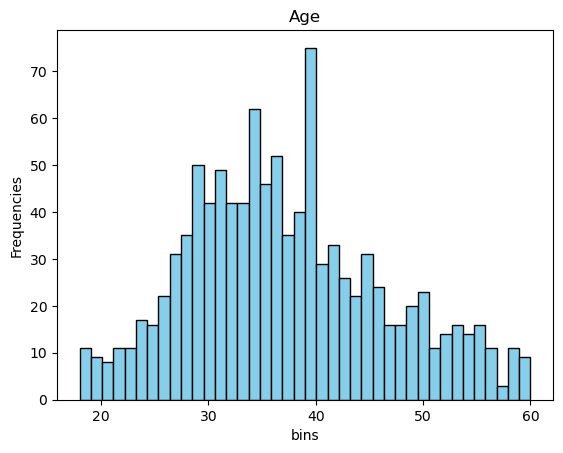

Number of zero bins in Age: 0


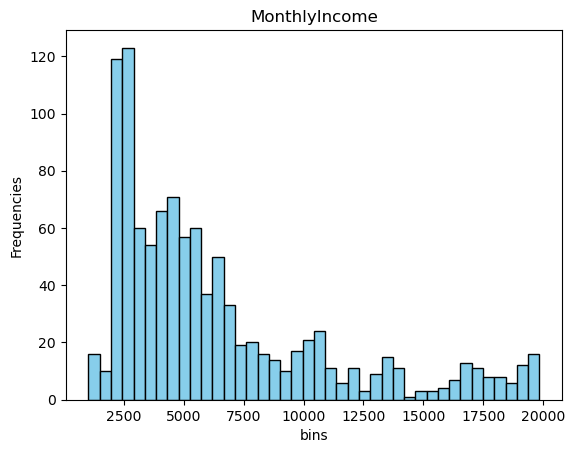

Number of zero bins in MonthlyIncome: 0


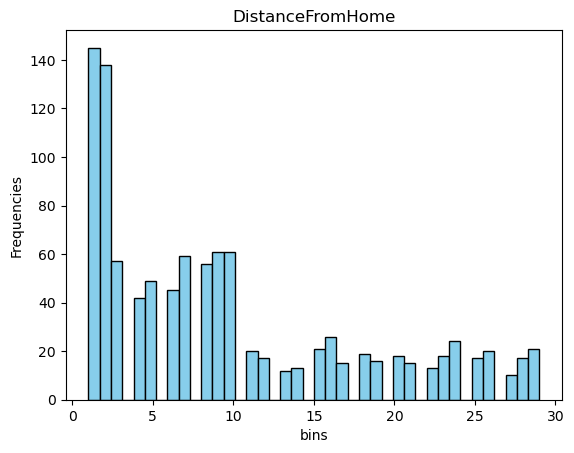

Number of zero bins in DistanceFromHome: 11


In [21]:
cols_name = ['Age', 'MonthlyIncome', 'DistanceFromHome']
for c in cols_name:
    plot_histogram(train[~np.isnan(train[c])], c, bins=40, subplot= False)

Ans: เมื่อทำการ discretize โดยใช้ Bins = 40 พบว่ากราฟของ อายุ และรายได้ต่อเดือน ไม่มี่มีจำนวน bins ที่ทำให้เกิดช่องว่างระหว่างข้อมูลเลย แต่กราฟของระยะทางจากบ้านมีจำนวน bins ที่เป็นช่องว่างอยู่ 11 ตัว ดังนั้นจำนวน Bins = 40 ไม่มีความเหมาะสมในการทำ discretization

### 2.2. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model(GMM)?

Ans : สำหรับ Age ที่มีลักษณะข้อมูลเป็น normal distribution สามารถใช้ gaussian estimate ได้ ส่วน feature ที่เหลือมีลักษณะข้อมูลไปทางเบ้ขวาและไม่ค่อยสม่ำเสมอ การใช้ gaussian mixture model จะช่วยเติมเต็มข้อมูลและ estimate ข้อมูลได้ดีกว่าการใช้ gaussian estimate

### 2.3. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each feature? Why?

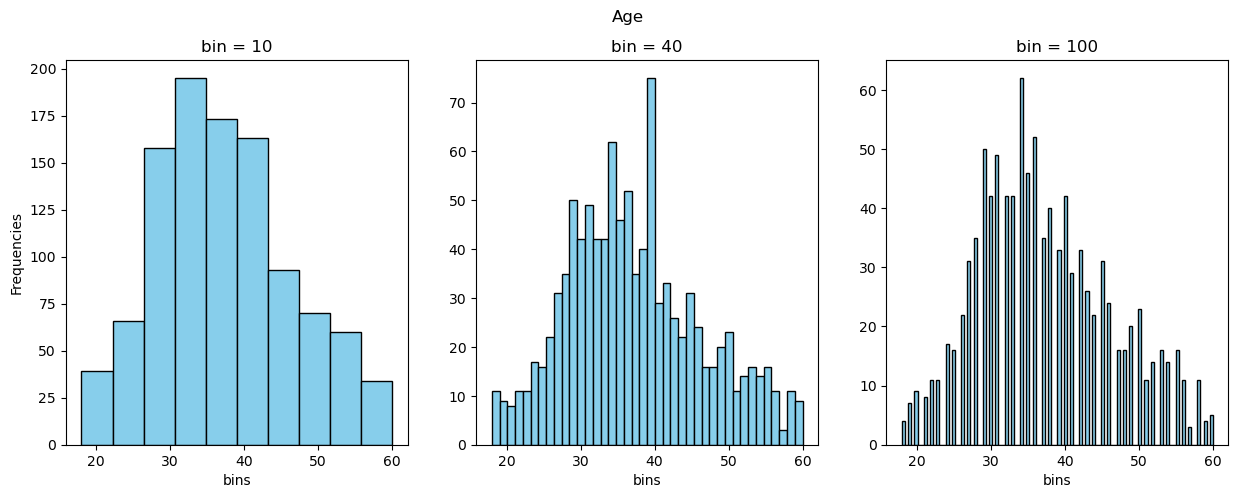

Number of zero bins 10 in Age: 0
Number of zero bins 40 in Age: 0
Number of zero bins 100 in Age: 57


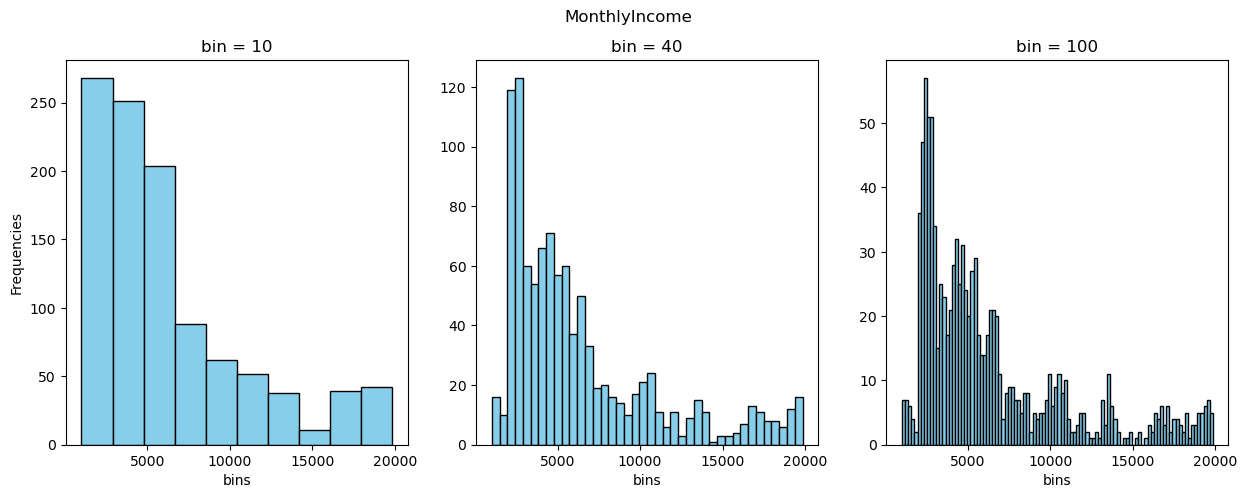

Number of zero bins 10 in MonthlyIncome: 0
Number of zero bins 40 in MonthlyIncome: 0
Number of zero bins 100 in MonthlyIncome: 3


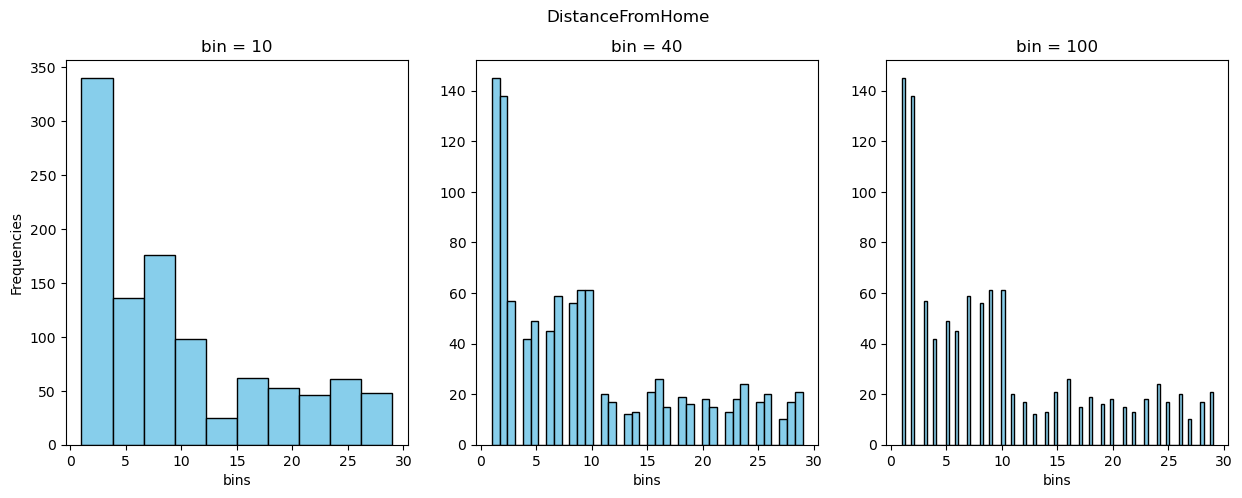

Number of zero bins 10 in DistanceFromHome: 0
Number of zero bins 40 in DistanceFromHome: 11
Number of zero bins 100 in DistanceFromHome: 71


In [22]:
cols_name = ['Age','MonthlyIncome','DistanceFromHome']
for col in cols_name:
    plot_histogram(train, col, [10, 40, 100], subplot=True)

Ans: Bins = 40 เป็นจำนวน Bins ที่มีความเหมาะสมมากที่สุด เนื่องจากมีการเกิดช่องว่างระหว่างข้อมูลน้อยที่สุด

### 2.4. For the rest of the features (Numeric and Category), which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not?

Plot histogram numurical feature by bins = 10, 15, 20, 25, 30

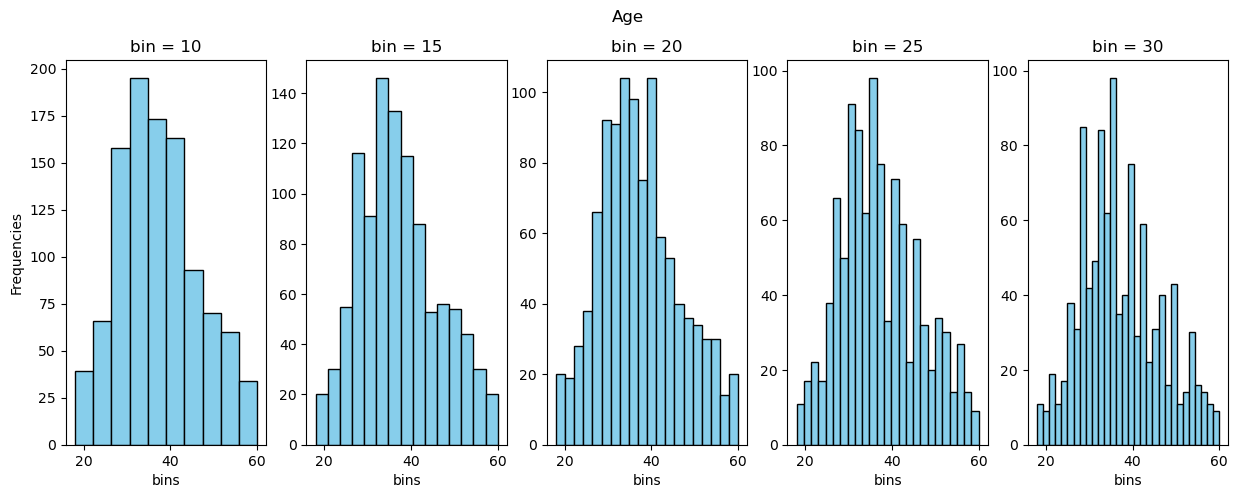

Number of zero bins 10 in Age: 0
Number of zero bins 15 in Age: 0
Number of zero bins 20 in Age: 0
Number of zero bins 25 in Age: 0
Number of zero bins 30 in Age: 0


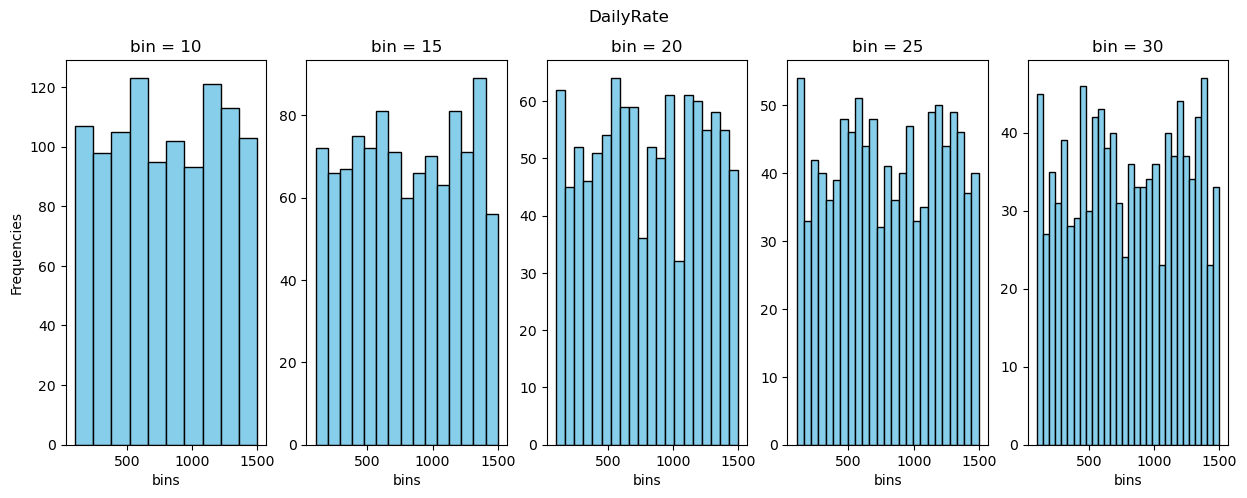

Number of zero bins 10 in DailyRate: 0
Number of zero bins 15 in DailyRate: 0
Number of zero bins 20 in DailyRate: 0
Number of zero bins 25 in DailyRate: 0
Number of zero bins 30 in DailyRate: 0


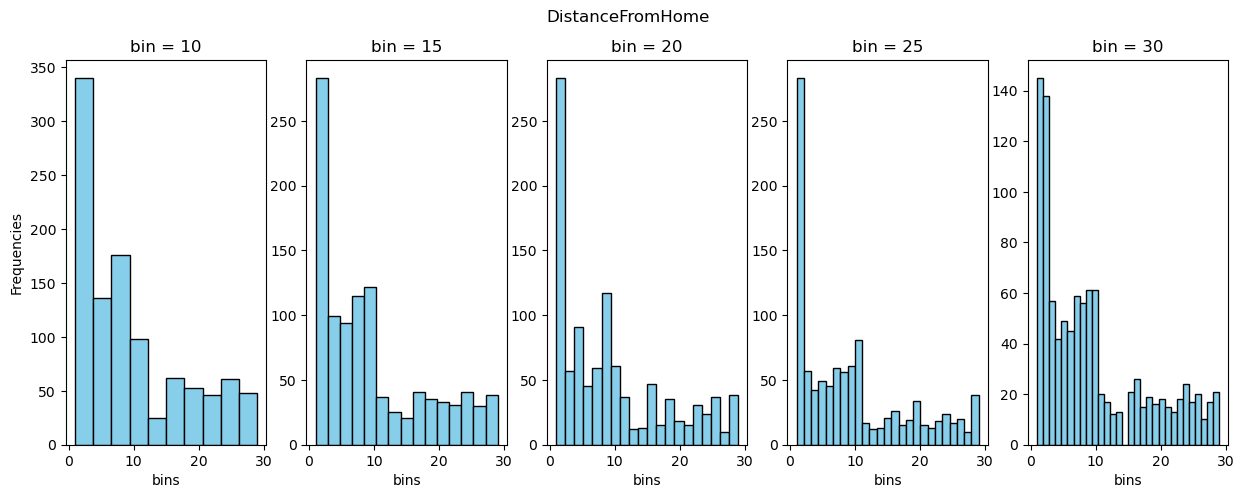

Number of zero bins 10 in DistanceFromHome: 0
Number of zero bins 15 in DistanceFromHome: 0
Number of zero bins 20 in DistanceFromHome: 0
Number of zero bins 25 in DistanceFromHome: 0
Number of zero bins 30 in DistanceFromHome: 1


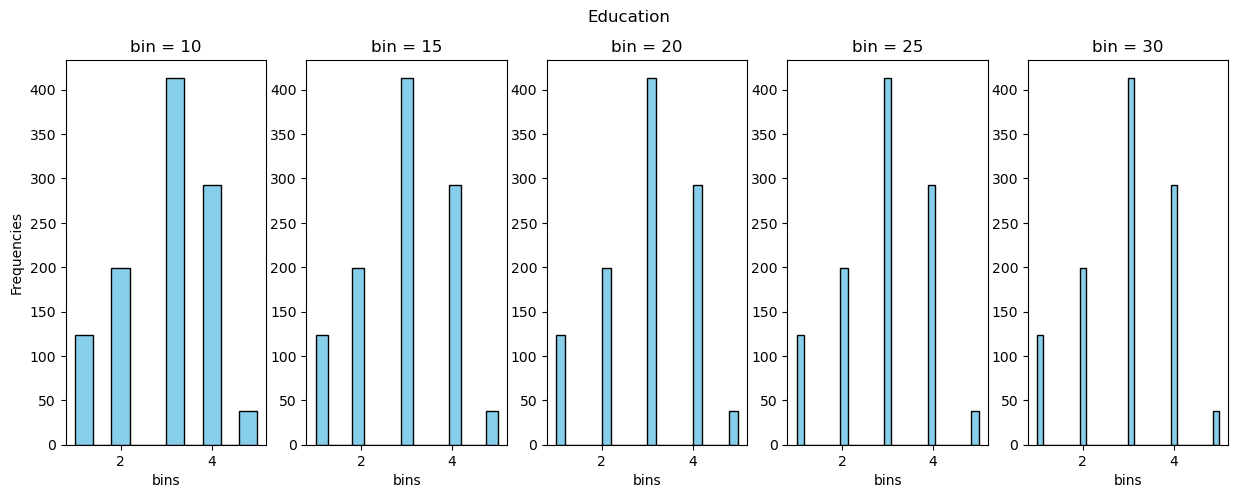

Number of zero bins 10 in Education: 5
Number of zero bins 15 in Education: 10
Number of zero bins 20 in Education: 15
Number of zero bins 25 in Education: 20
Number of zero bins 30 in Education: 25


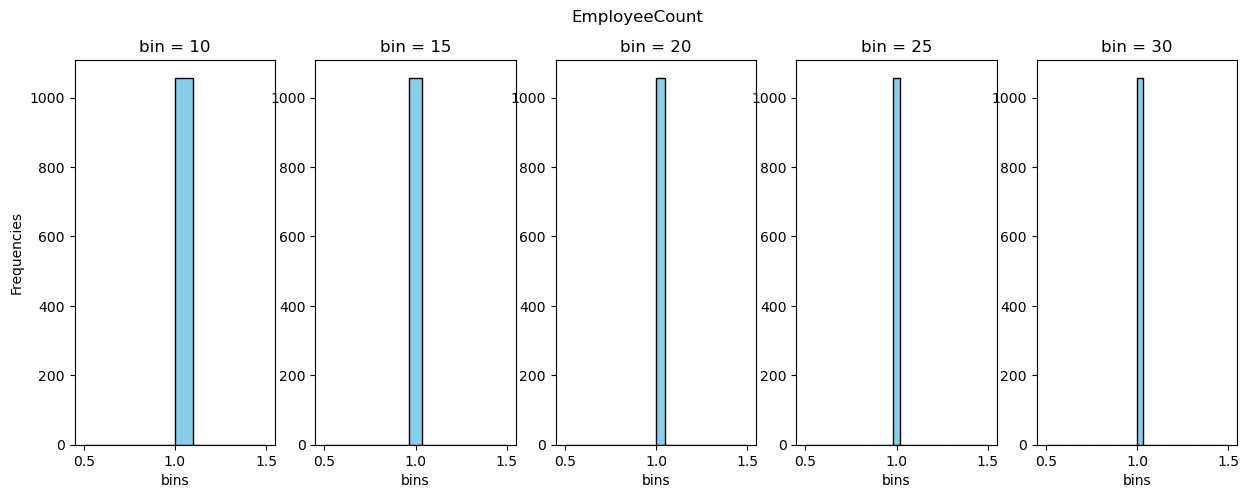

Number of zero bins 10 in EmployeeCount: 9
Number of zero bins 15 in EmployeeCount: 14
Number of zero bins 20 in EmployeeCount: 19
Number of zero bins 25 in EmployeeCount: 24
Number of zero bins 30 in EmployeeCount: 29


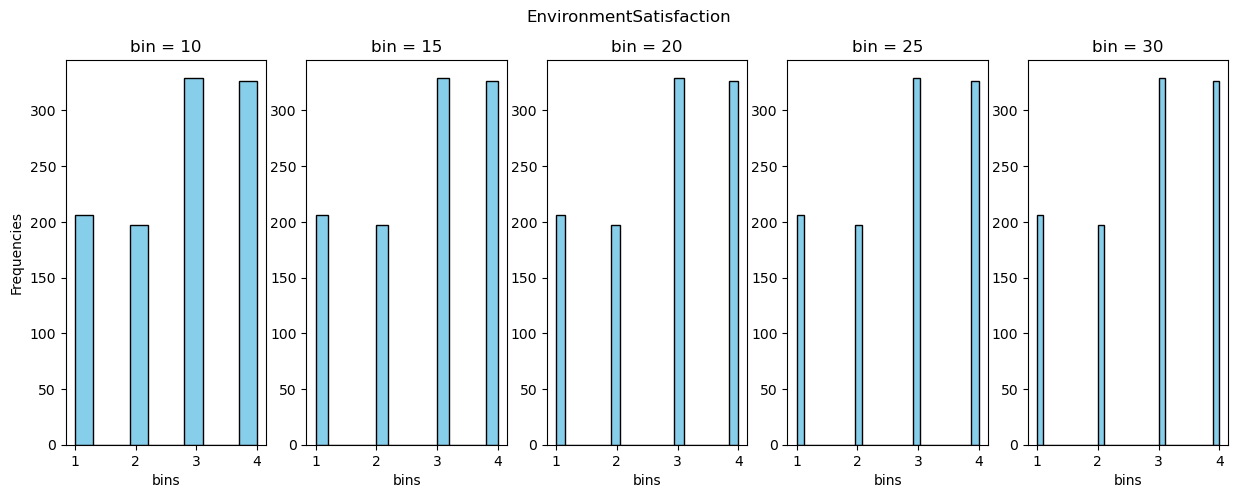

Number of zero bins 10 in EnvironmentSatisfaction: 6
Number of zero bins 15 in EnvironmentSatisfaction: 11
Number of zero bins 20 in EnvironmentSatisfaction: 16
Number of zero bins 25 in EnvironmentSatisfaction: 21
Number of zero bins 30 in EnvironmentSatisfaction: 26


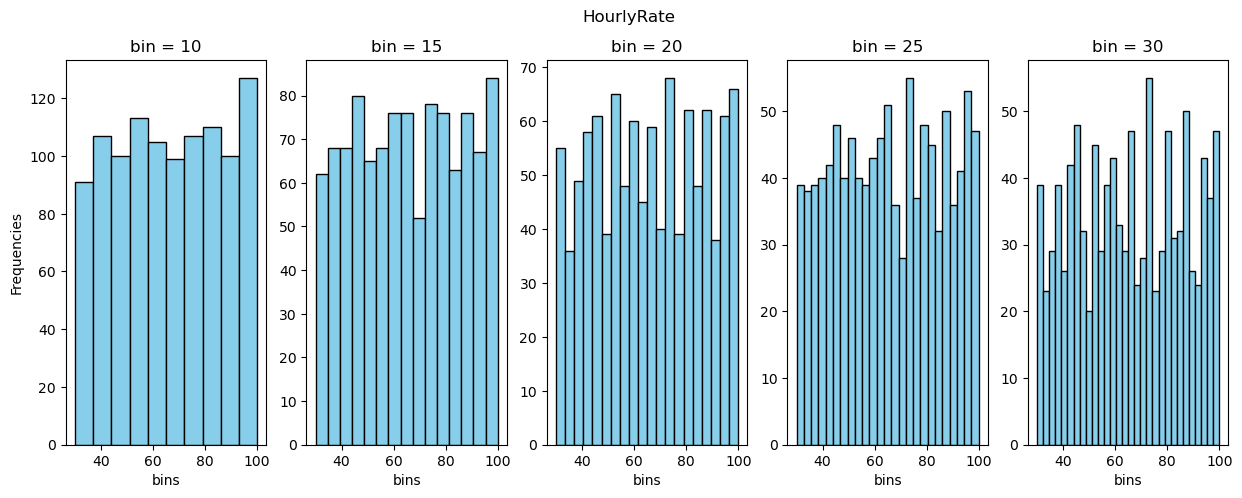

Number of zero bins 10 in HourlyRate: 0
Number of zero bins 15 in HourlyRate: 0
Number of zero bins 20 in HourlyRate: 0
Number of zero bins 25 in HourlyRate: 0
Number of zero bins 30 in HourlyRate: 0


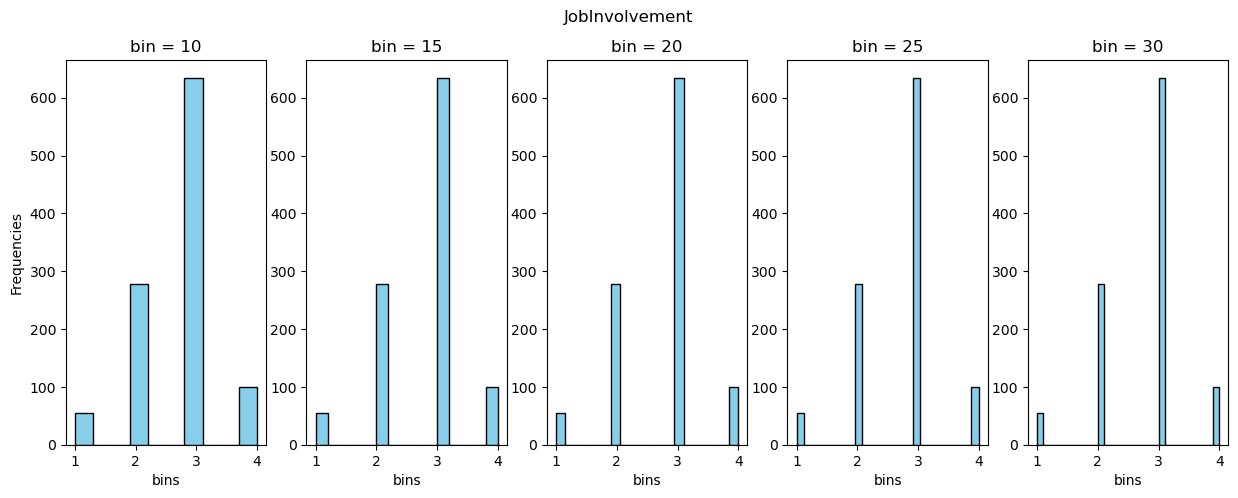

Number of zero bins 10 in JobInvolvement: 6
Number of zero bins 15 in JobInvolvement: 11
Number of zero bins 20 in JobInvolvement: 16
Number of zero bins 25 in JobInvolvement: 21
Number of zero bins 30 in JobInvolvement: 26


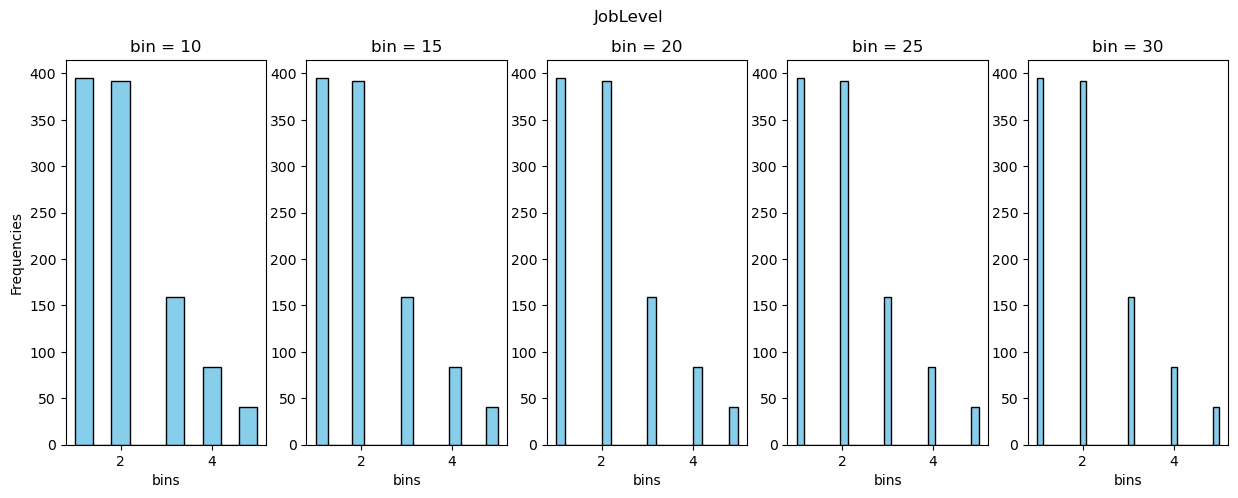

Number of zero bins 10 in JobLevel: 5
Number of zero bins 15 in JobLevel: 10
Number of zero bins 20 in JobLevel: 15
Number of zero bins 25 in JobLevel: 20
Number of zero bins 30 in JobLevel: 25


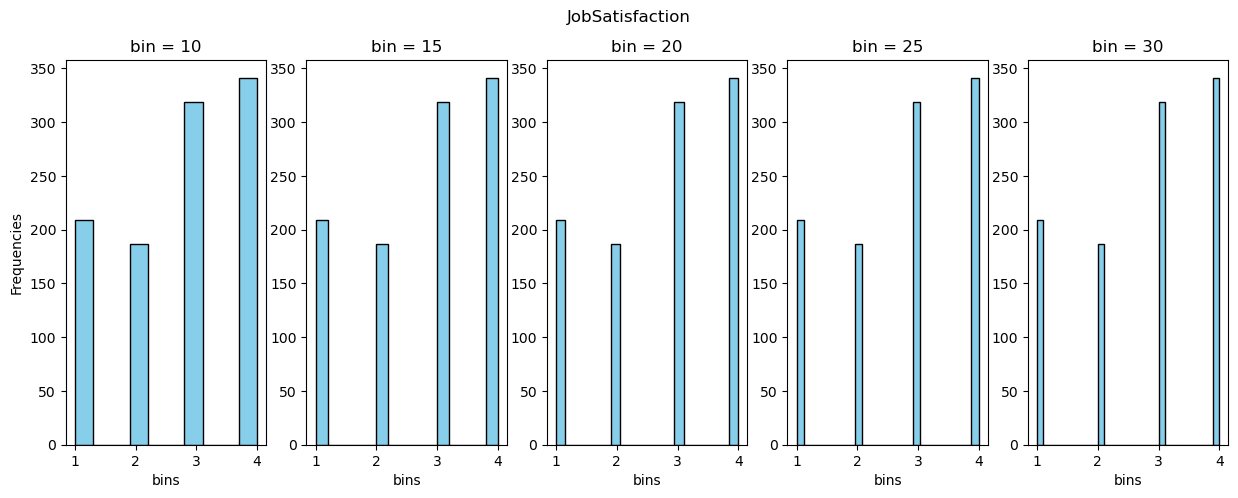

Number of zero bins 10 in JobSatisfaction: 6
Number of zero bins 15 in JobSatisfaction: 11
Number of zero bins 20 in JobSatisfaction: 16
Number of zero bins 25 in JobSatisfaction: 21
Number of zero bins 30 in JobSatisfaction: 26


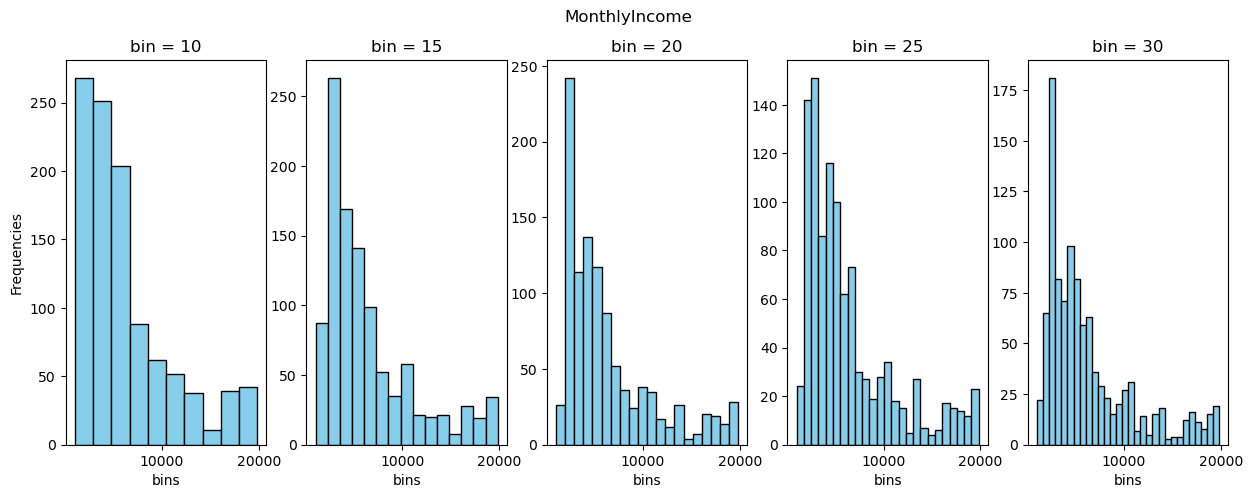

Number of zero bins 10 in MonthlyIncome: 0
Number of zero bins 15 in MonthlyIncome: 0
Number of zero bins 20 in MonthlyIncome: 0
Number of zero bins 25 in MonthlyIncome: 0
Number of zero bins 30 in MonthlyIncome: 0


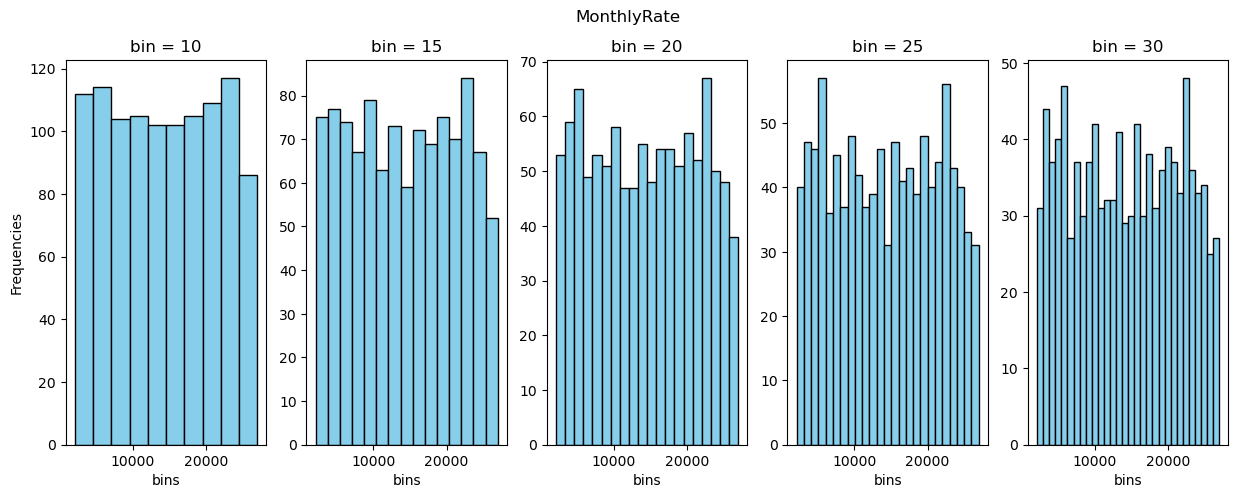

Number of zero bins 10 in MonthlyRate: 0
Number of zero bins 15 in MonthlyRate: 0
Number of zero bins 20 in MonthlyRate: 0
Number of zero bins 25 in MonthlyRate: 0
Number of zero bins 30 in MonthlyRate: 0


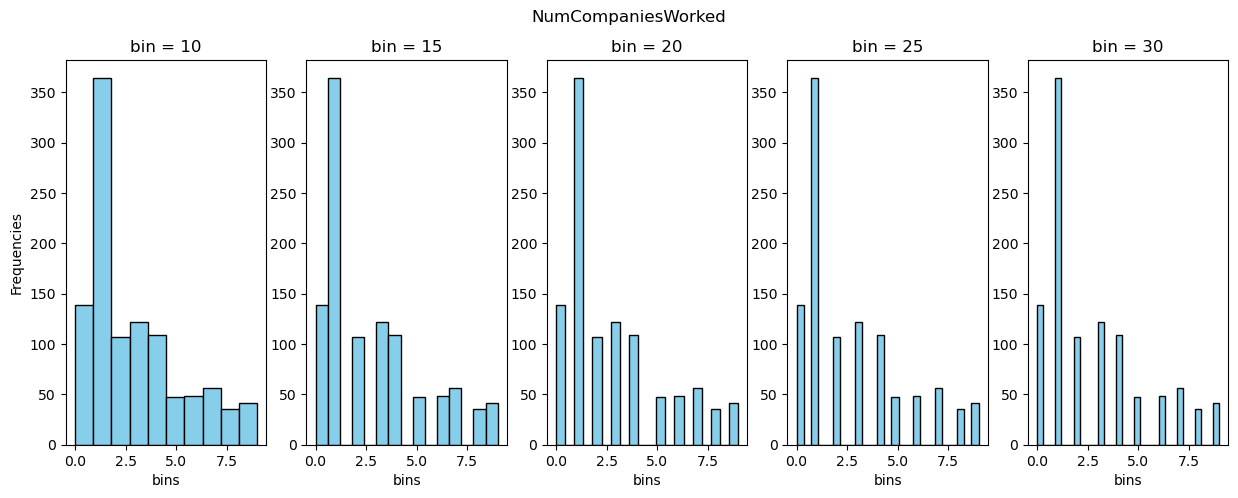

Number of zero bins 10 in NumCompaniesWorked: 0
Number of zero bins 15 in NumCompaniesWorked: 5
Number of zero bins 20 in NumCompaniesWorked: 10
Number of zero bins 25 in NumCompaniesWorked: 15
Number of zero bins 30 in NumCompaniesWorked: 20


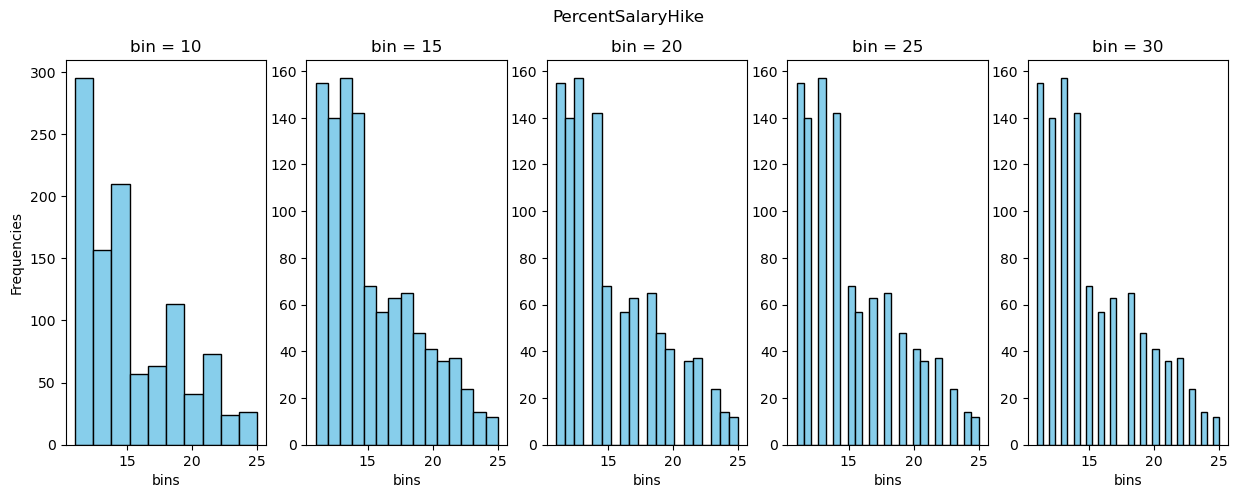

Number of zero bins 10 in PercentSalaryHike: 0
Number of zero bins 15 in PercentSalaryHike: 0
Number of zero bins 20 in PercentSalaryHike: 5
Number of zero bins 25 in PercentSalaryHike: 10
Number of zero bins 30 in PercentSalaryHike: 15


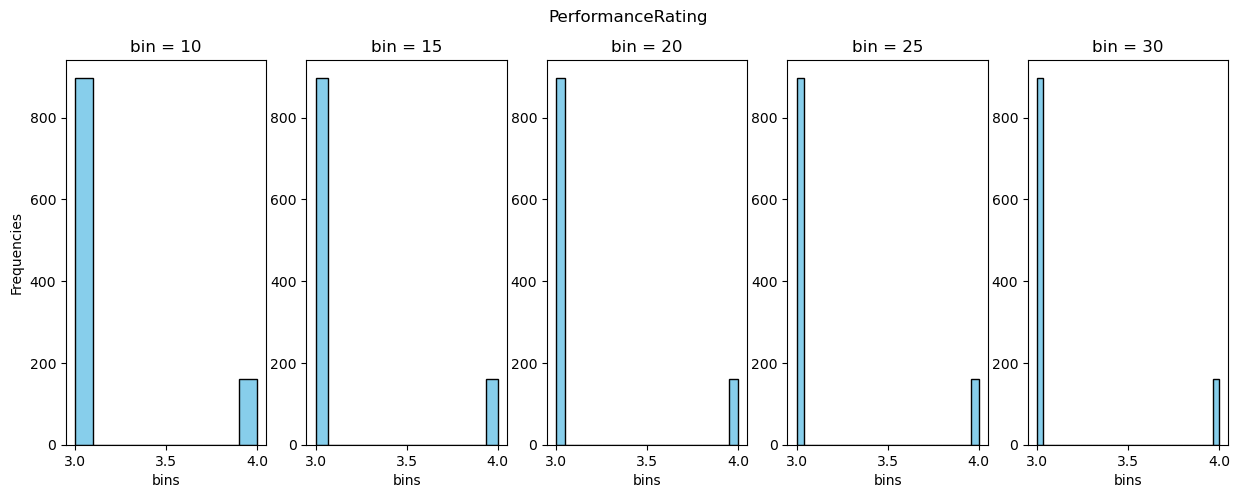

Number of zero bins 10 in PerformanceRating: 8
Number of zero bins 15 in PerformanceRating: 13
Number of zero bins 20 in PerformanceRating: 18
Number of zero bins 25 in PerformanceRating: 23
Number of zero bins 30 in PerformanceRating: 28


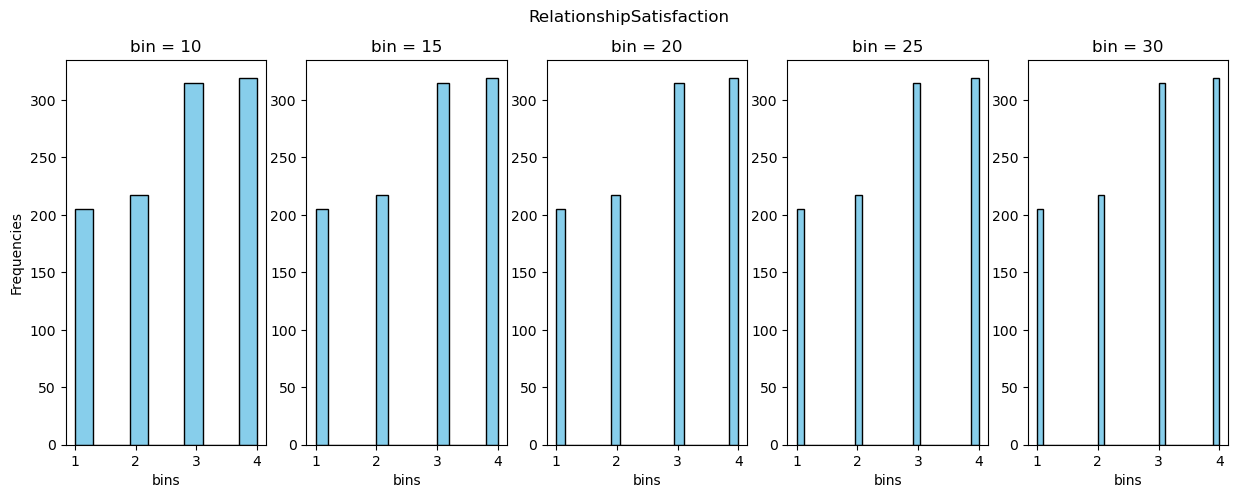

Number of zero bins 10 in RelationshipSatisfaction: 6
Number of zero bins 15 in RelationshipSatisfaction: 11
Number of zero bins 20 in RelationshipSatisfaction: 16
Number of zero bins 25 in RelationshipSatisfaction: 21
Number of zero bins 30 in RelationshipSatisfaction: 26


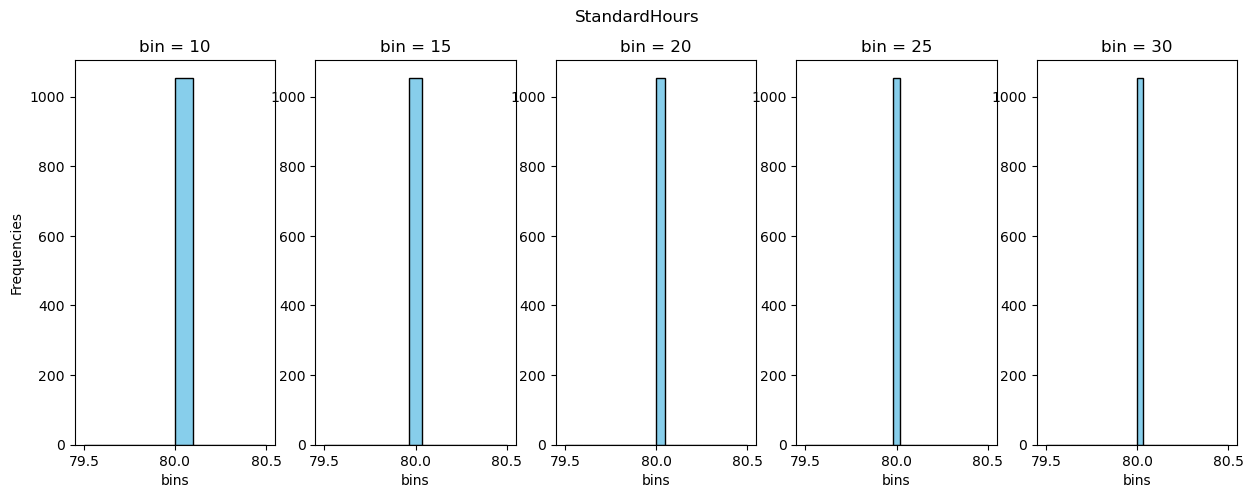

Number of zero bins 10 in StandardHours: 9
Number of zero bins 15 in StandardHours: 14
Number of zero bins 20 in StandardHours: 19
Number of zero bins 25 in StandardHours: 24
Number of zero bins 30 in StandardHours: 29


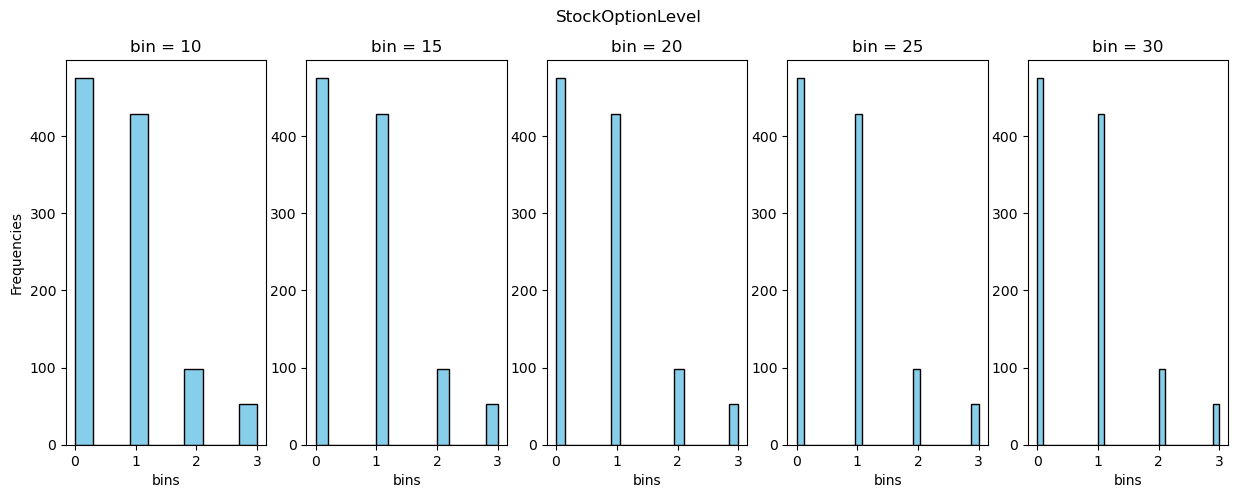

Number of zero bins 10 in StockOptionLevel: 6
Number of zero bins 15 in StockOptionLevel: 11
Number of zero bins 20 in StockOptionLevel: 16
Number of zero bins 25 in StockOptionLevel: 21
Number of zero bins 30 in StockOptionLevel: 26


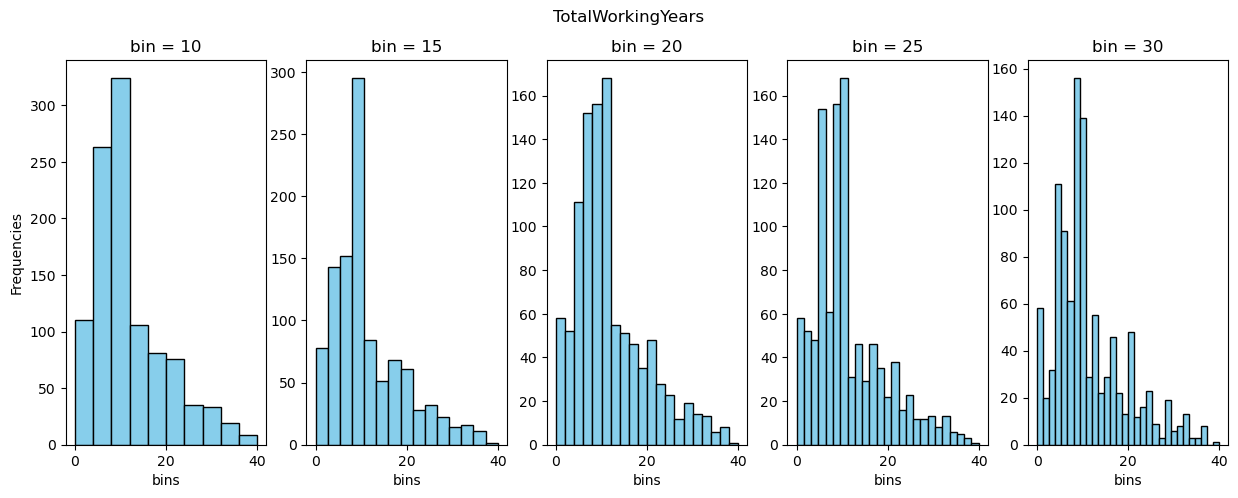

Number of zero bins 10 in TotalWorkingYears: 0
Number of zero bins 15 in TotalWorkingYears: 0
Number of zero bins 20 in TotalWorkingYears: 0
Number of zero bins 25 in TotalWorkingYears: 0
Number of zero bins 30 in TotalWorkingYears: 1


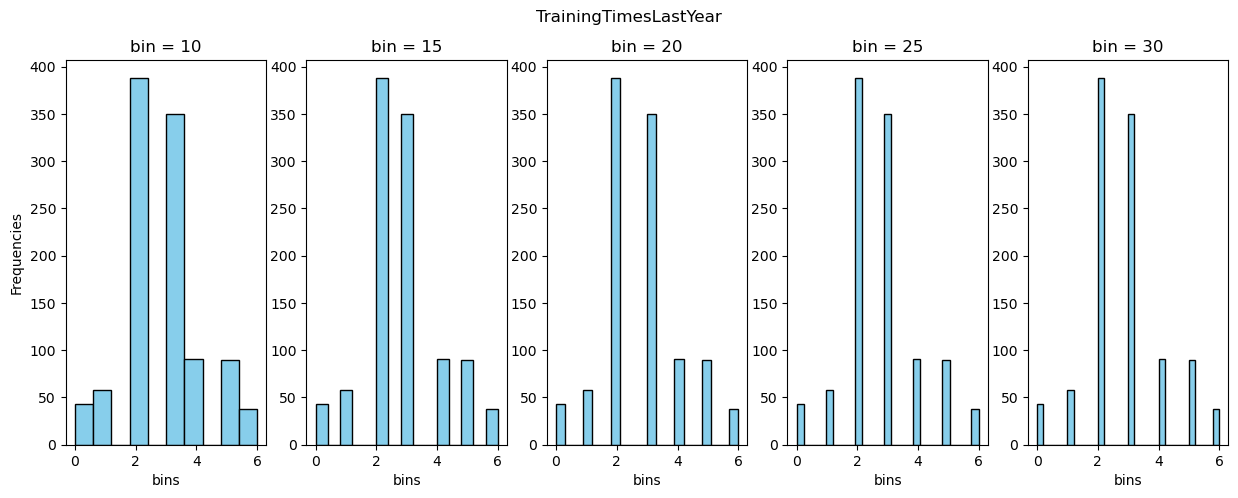

Number of zero bins 10 in TrainingTimesLastYear: 3
Number of zero bins 15 in TrainingTimesLastYear: 8
Number of zero bins 20 in TrainingTimesLastYear: 13
Number of zero bins 25 in TrainingTimesLastYear: 18
Number of zero bins 30 in TrainingTimesLastYear: 23


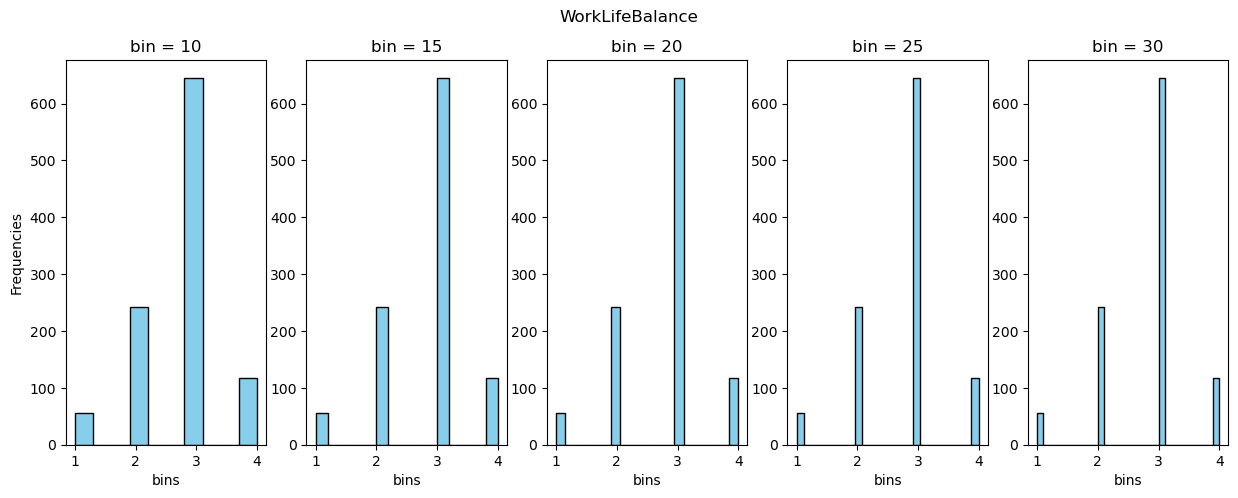

Number of zero bins 10 in WorkLifeBalance: 6
Number of zero bins 15 in WorkLifeBalance: 11
Number of zero bins 20 in WorkLifeBalance: 16
Number of zero bins 25 in WorkLifeBalance: 21
Number of zero bins 30 in WorkLifeBalance: 26


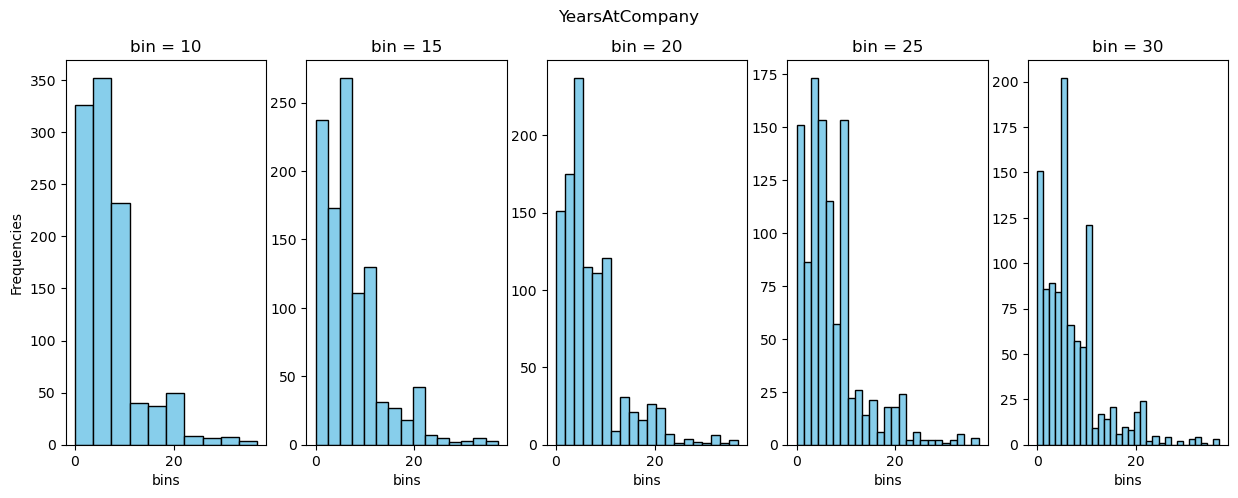

Number of zero bins 10 in YearsAtCompany: 0
Number of zero bins 15 in YearsAtCompany: 0
Number of zero bins 20 in YearsAtCompany: 0
Number of zero bins 25 in YearsAtCompany: 1
Number of zero bins 30 in YearsAtCompany: 3


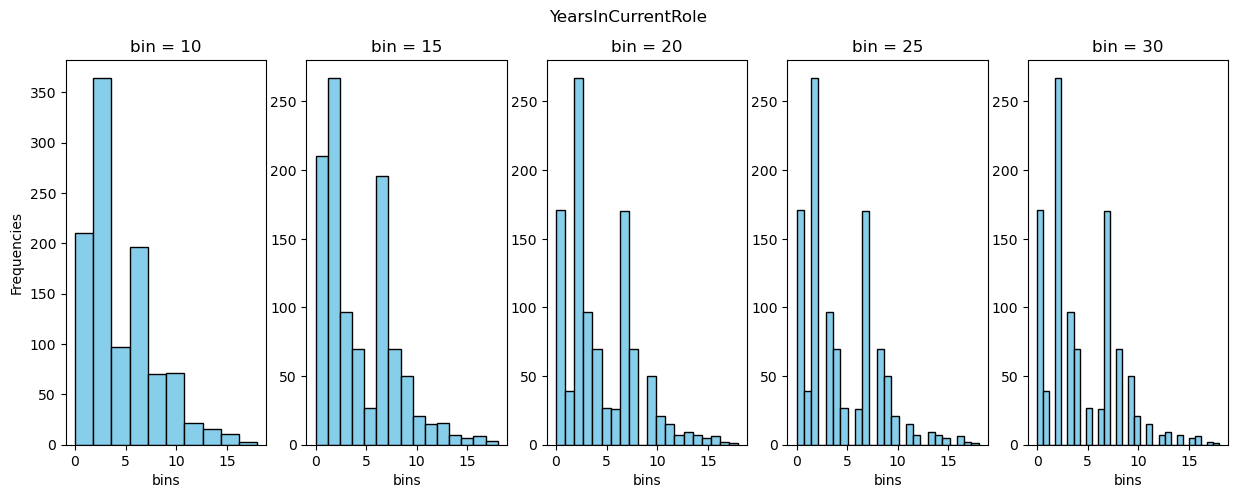

Number of zero bins 10 in YearsInCurrentRole: 0
Number of zero bins 15 in YearsInCurrentRole: 0
Number of zero bins 20 in YearsInCurrentRole: 1
Number of zero bins 25 in YearsInCurrentRole: 6
Number of zero bins 30 in YearsInCurrentRole: 11


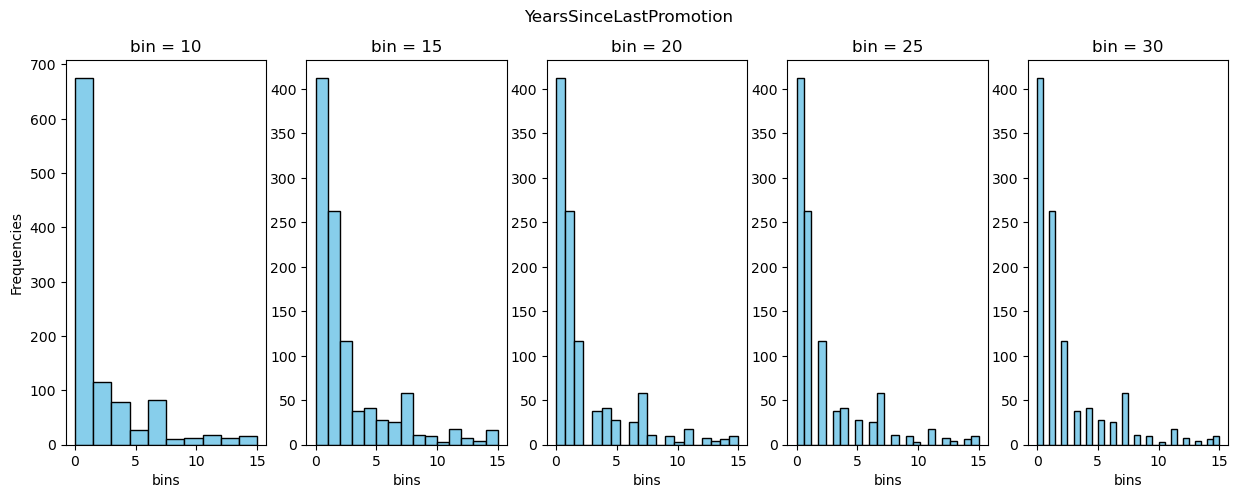

Number of zero bins 10 in YearsSinceLastPromotion: 0
Number of zero bins 15 in YearsSinceLastPromotion: 0
Number of zero bins 20 in YearsSinceLastPromotion: 4
Number of zero bins 25 in YearsSinceLastPromotion: 9
Number of zero bins 30 in YearsSinceLastPromotion: 14


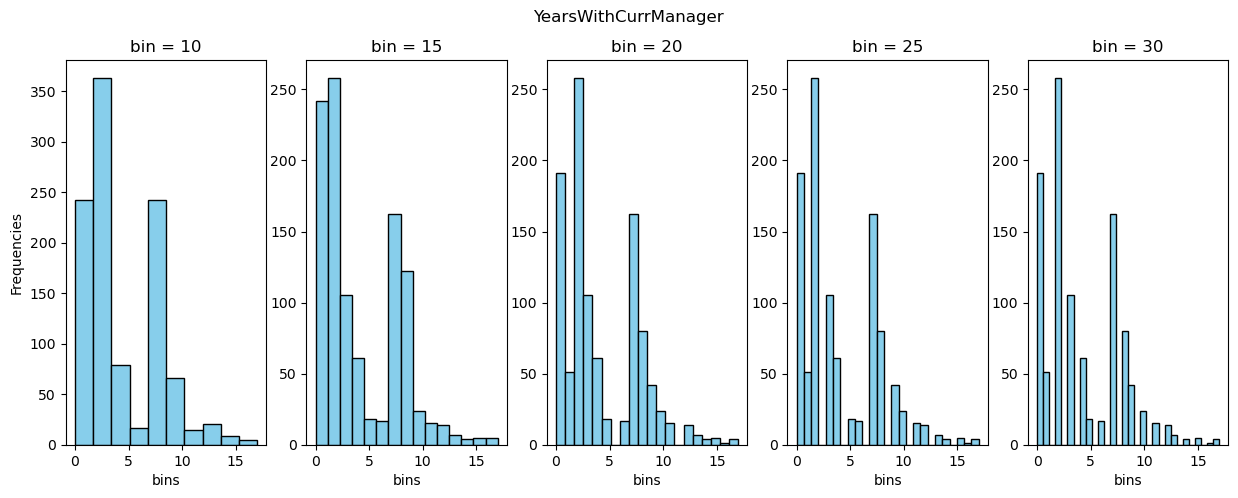

Number of zero bins 10 in YearsWithCurrManager: 0
Number of zero bins 15 in YearsWithCurrManager: 0
Number of zero bins 20 in YearsWithCurrManager: 2
Number of zero bins 25 in YearsWithCurrManager: 7
Number of zero bins 30 in YearsWithCurrManager: 12


In [23]:
# cols_name = ['Age','MonthlyIncome','DistanceFromHome']
for col in num_cols:
    plot_histogram(train, col, [10,15,20,25,30], out_cols = 'Attrition', subplot= True)

Plot histigram catagoricals feature by bins = 10, 15, 20, 25, 30

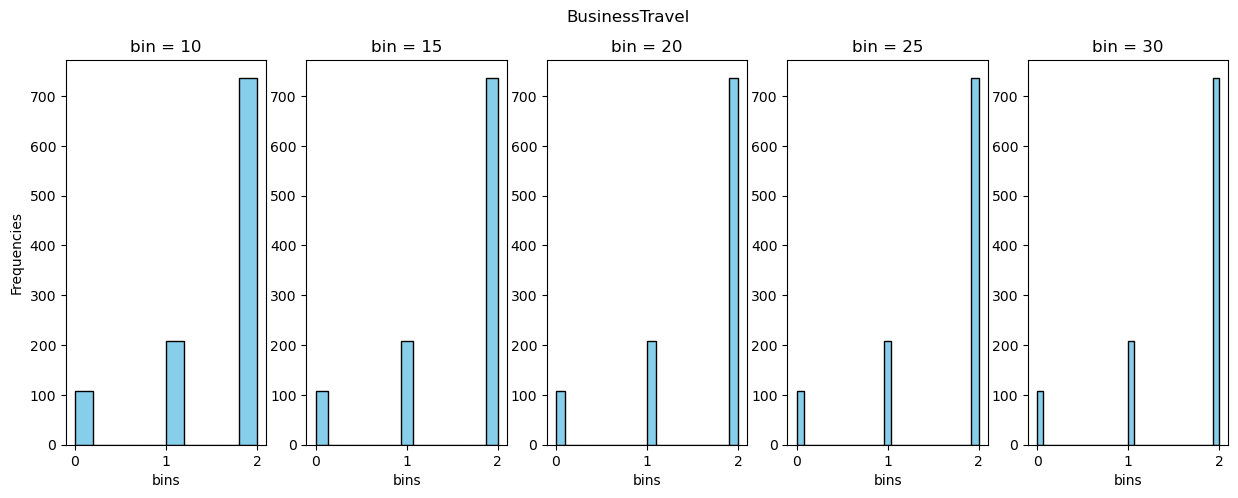

Number of zero bins 10 in BusinessTravel: 7
Number of zero bins 15 in BusinessTravel: 12
Number of zero bins 20 in BusinessTravel: 17
Number of zero bins 25 in BusinessTravel: 22
Number of zero bins 30 in BusinessTravel: 27


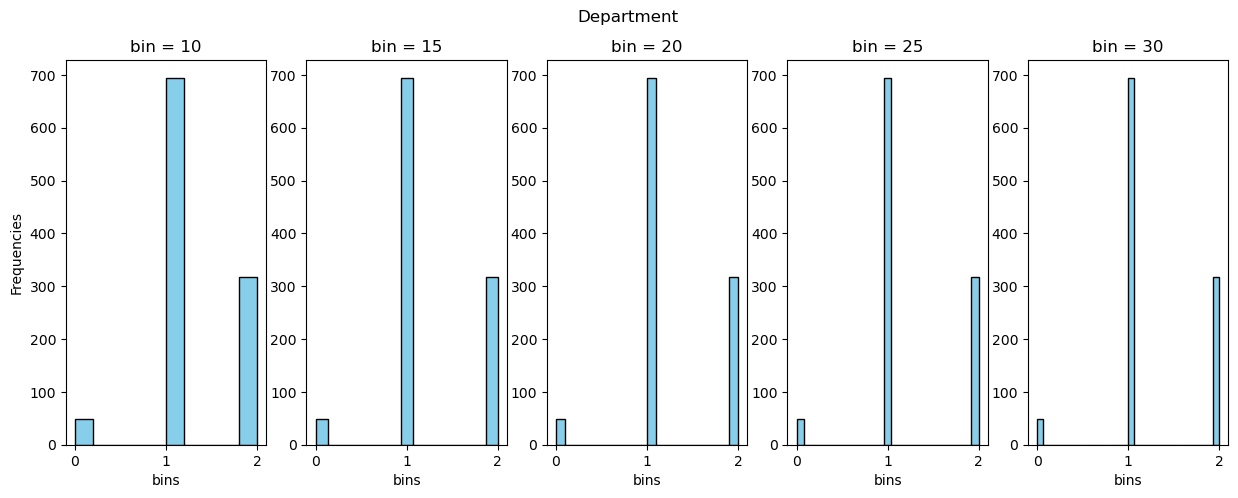

Number of zero bins 10 in Department: 7
Number of zero bins 15 in Department: 12
Number of zero bins 20 in Department: 17
Number of zero bins 25 in Department: 22
Number of zero bins 30 in Department: 27


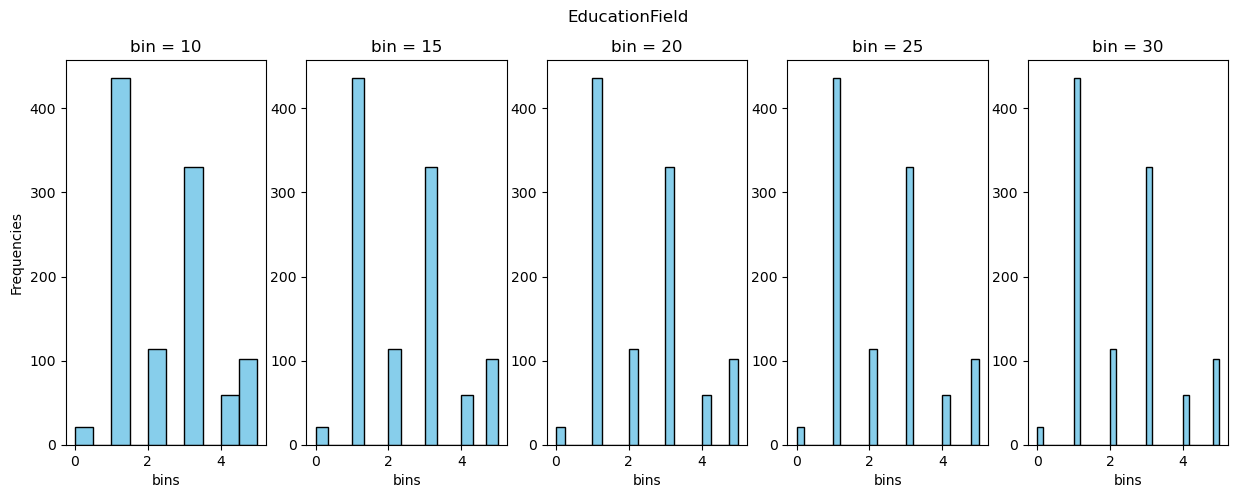

Number of zero bins 10 in EducationField: 4
Number of zero bins 15 in EducationField: 9
Number of zero bins 20 in EducationField: 14
Number of zero bins 25 in EducationField: 19
Number of zero bins 30 in EducationField: 24


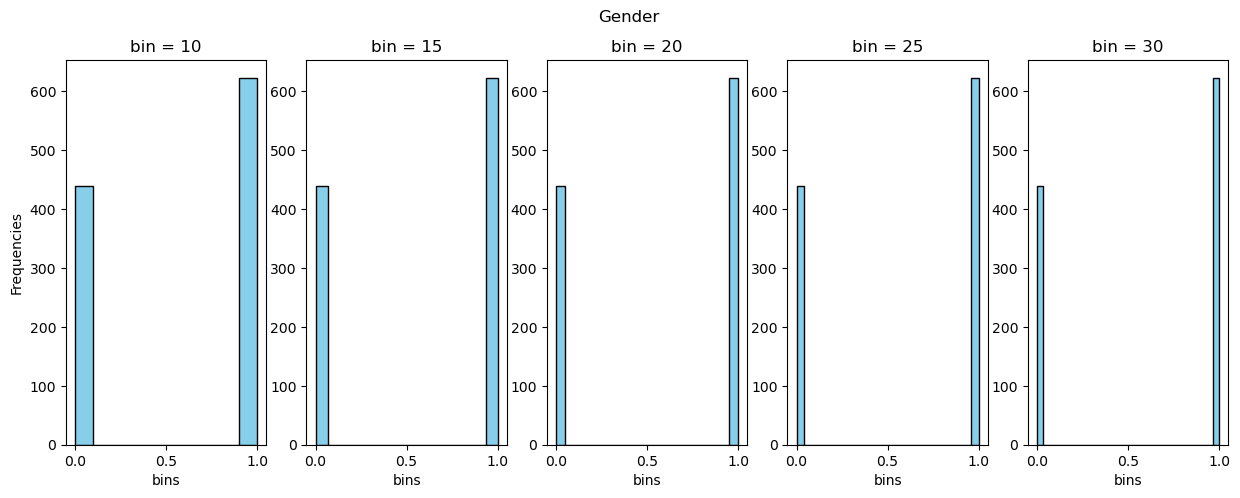

Number of zero bins 10 in Gender: 8
Number of zero bins 15 in Gender: 13
Number of zero bins 20 in Gender: 18
Number of zero bins 25 in Gender: 23
Number of zero bins 30 in Gender: 28


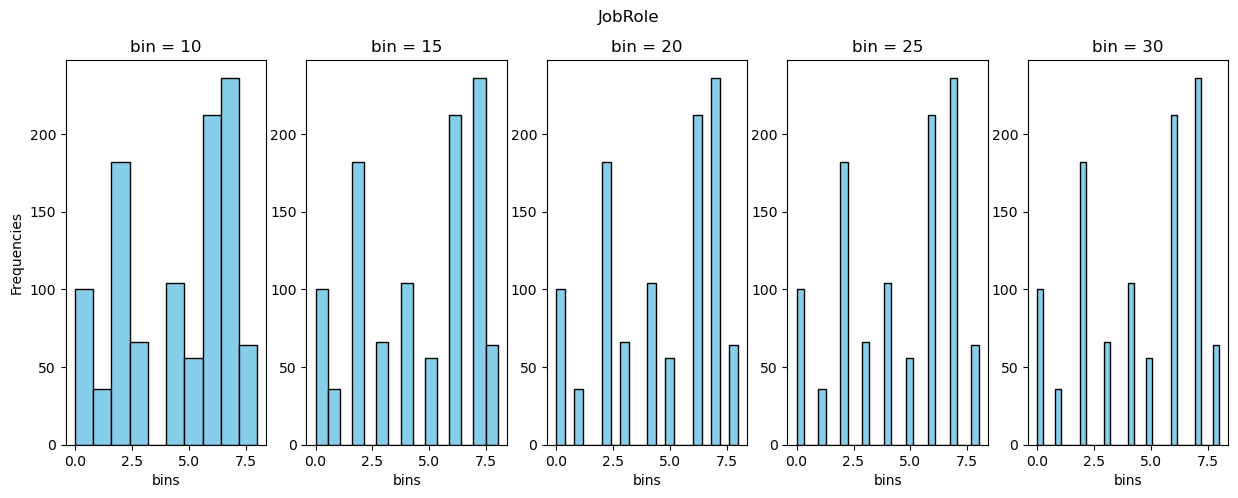

Number of zero bins 10 in JobRole: 1
Number of zero bins 15 in JobRole: 6
Number of zero bins 20 in JobRole: 11
Number of zero bins 25 in JobRole: 16
Number of zero bins 30 in JobRole: 21


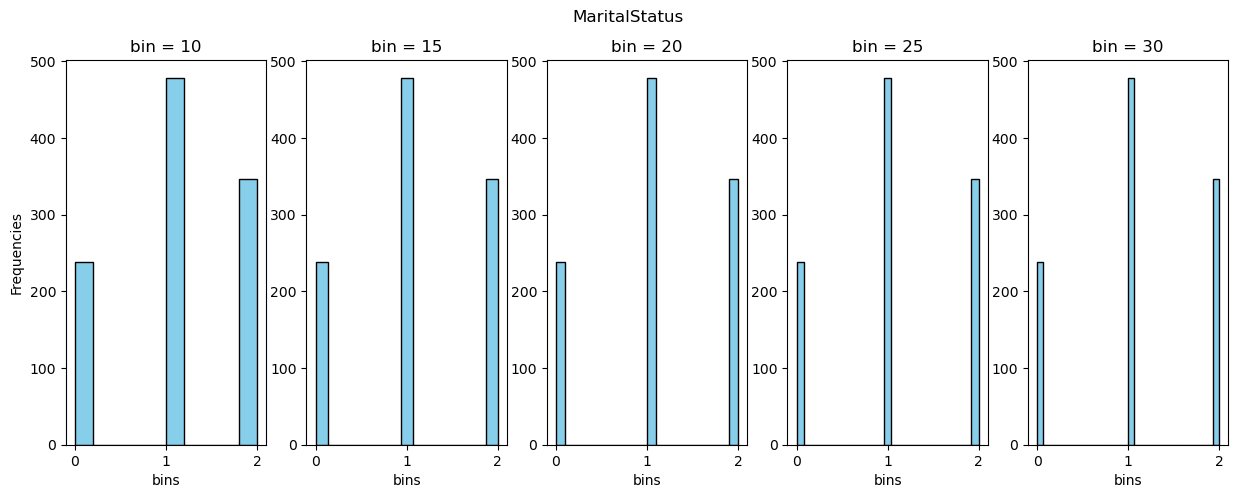

Number of zero bins 10 in MaritalStatus: 7
Number of zero bins 15 in MaritalStatus: 12
Number of zero bins 20 in MaritalStatus: 17
Number of zero bins 25 in MaritalStatus: 22
Number of zero bins 30 in MaritalStatus: 27


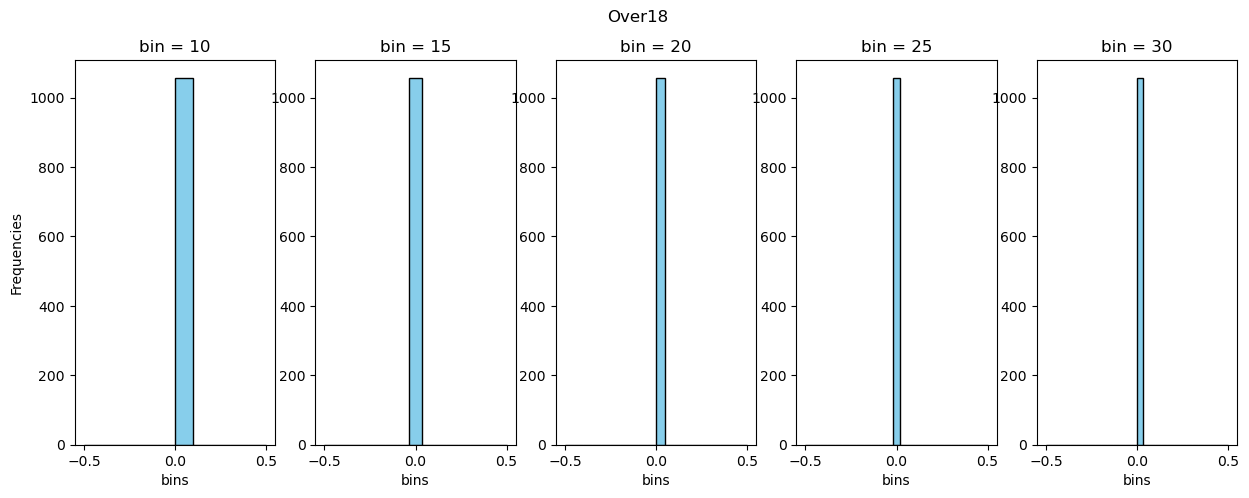

Number of zero bins 10 in Over18: 9
Number of zero bins 15 in Over18: 14
Number of zero bins 20 in Over18: 19
Number of zero bins 25 in Over18: 24
Number of zero bins 30 in Over18: 29


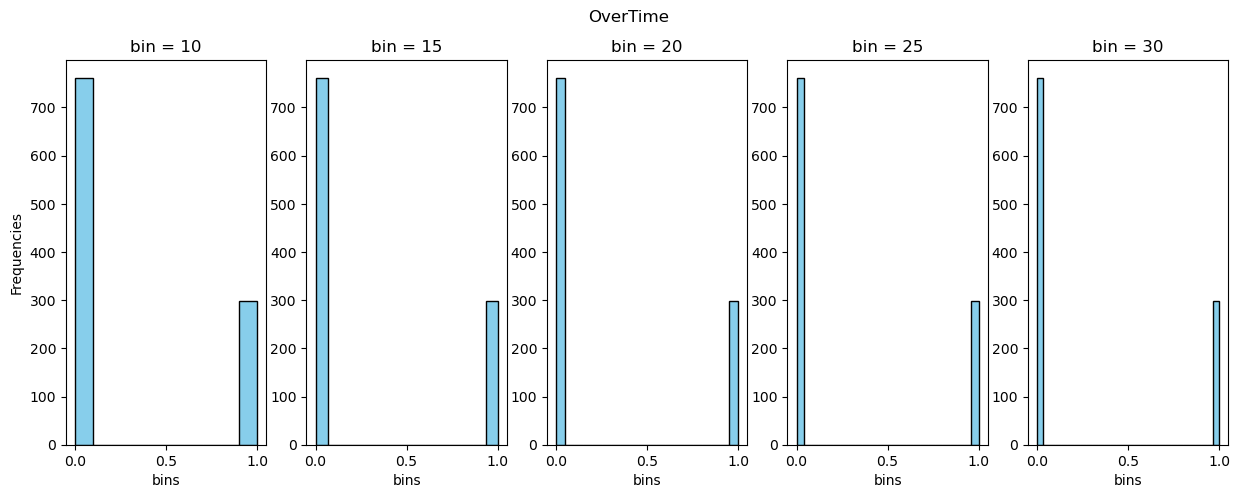

Number of zero bins 10 in OverTime: 8
Number of zero bins 15 in OverTime: 13
Number of zero bins 20 in OverTime: 18
Number of zero bins 25 in OverTime: 23
Number of zero bins 30 in OverTime: 28


In [24]:
for col in cat_cols:
    plot_histogram(train, col, [10,15,20,25,30], out_cols = 'Attrition', subplot= True)

Drop column that have only 1 value

- EmployeeCount
- Over18
- StandardHours

In [25]:
train = train.drop(['EmployeeCount','Over18','StandardHours'], axis=1)

test = test.drop(['EmployeeCount','Over18','StandardHours'], axis=1)


Ans : โดย Bins ที่ใช้สำหรับ discretiz คือ Bins = 20 เนื่องจากมีความถี่ในการเกิดของข้อมูลในแต่ละ bins ที่ละเอียด และมีการเกิดช่วงที่เป็นช่องว่างระหว่างข้อมูลน้อย โดยเลือกตัด Feature EmployeeCount- Over18- StandardHours ออก โดยสังเกตจาก Bins ที่มีค่าอยู่ในช่วงเดียว

The MLE for the likelihood distribution of discretized histograms

### 2.5. Plot the likelihood distributions of the features from (4) for different Attrition values.

In [26]:
def calculate_prod_dis(data,out_class, n_bins):
    class_dict = {}
    for cls in data[out_class].unique():
        
        sep_df = data.loc[data[out_class] == cls] # 1 for yes # 0 for no
        sep_df.drop([out_class] ,axis=1)

        fea_prob_dict = {}
        for fea in sep_df.columns:
            total_data_count = data.shape[0]
            # Drop NaN Values
            data_no_nan = sep_df[fea].dropna()
            
            histogram_counts, bin_edges = np.histogram(data_no_nan, n_bins)
            # Calculate probability densities
            probability_densities = histogram_counts / total_data_count
            # print(sum(probability_densities))
            bin_prob = {}
            for ind, b in enumerate(histogram_counts):
                bin_prob[ind] = probability_densities[ind]

            fea_prob_dict[fea] = bin_prob

        class_dict[cls] = fea_prob_dict

    return class_dict


In [27]:
prob = calculate_prod_dis(train, 'Attrition', n_bins= 20)
print(prob)

{0: {'Age': {0: 0.006051437216338881, 1: 0.009077155824508321, 2: 0.01361573373676248, 3: 0.02118003025718608, 4: 0.04084720121028744, 5: 0.05446293494704992, 6: 0.05446293494704992, 7: 0.06656580937972768, 8: 0.06656580937972768, 9: 0.0529500756429652, 10: 0.06883509833585477, 11: 0.04236006051437216, 12: 0.03555219364599092, 13: 0.02798789712556732, 14: 0.024205748865355523, 15: 0.0226928895612708, 16: 0.019667170953101363, 17: 0.02118003025718608, 18: 0.00832072617246596, 19: 0.012102874432677761}, 'Attrition': {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.8388804841149773, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0}, 'BusinessTravel': {0: 0.07488653555219364, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.1157337367624811, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.4735249621785174}, 'DailyRate': {0: 0.039334341906202726, 1: 0.0279878971255

In [28]:
def his_to_likely(data,n_bins, plot = True): # histogram to likelyhood

    total_data_count = len(data)
    
    prob_den = {}
    bin_cen = {}
    bin_wid = {}
    # for c in data['Attrition'].unique():
        # print(c)
        # sep_data = data.loc[data['Attrition'] == c]
        # print(sep_data)
    for col in data.columns:
        x = pd.DataFrame()
        x[col] = data[col]
        x['Attrition'] = data['Attrition']
        x = x.dropna()
        data_arr = np.array(data[col].dropna())  # Drop NaN Values

        _ , bin_edges = np.histogram(data_arr, n_bins) # count value in bin

        x[col] = np.digitize(data_arr, bin_edges) # map value to bin

        # Calculate bin widths
        bin_widths = np.diff(bin_edges)

        prob_den[col] = {}
        bin_cen[col] = {}
        bin_wid[col] = {}
        for c in data['Attrition'].unique():
            histogram_counts , _ = np.histogram(x[col].loc[x['Attrition'] == c], n_bins) # count value in bin

            # Calculate probability densities
            probability_densities = histogram_counts / len(data[col].loc[data['Attrition'] == c])
            # print(sum(probability_densities))
            # Calculate bin centers
            bin_centers = bin_edges[:-1] + bin_widths / 2

            prob_den[col][c] = probability_densities
            bin_cen[col][c] = bin_centers
            bin_wid[col][c] = bin_widths
    # print(prob_den)
            
    # Plot likelihood distribution
    color = ['red', 'blue']
    if plot:
        for col in prob_den.keys():
            for i in prob_den[col].keys():

                plt.bar(bin_cen[col][i], prob_den[col][i], width=bin_wid[col][i], align='center', alpha=0.5, edgecolor='black')
                plt.plot(bin_cen[col][i], prob_den[col][i], color=color[i], linestyle='-', linewidth=2)

                plt.xlabel('Value')
                plt.ylabel('Likelihood')
                plt.title(col)
        
            plt.show()


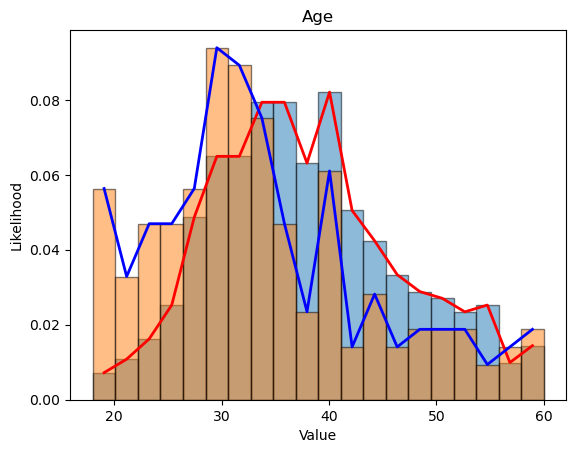

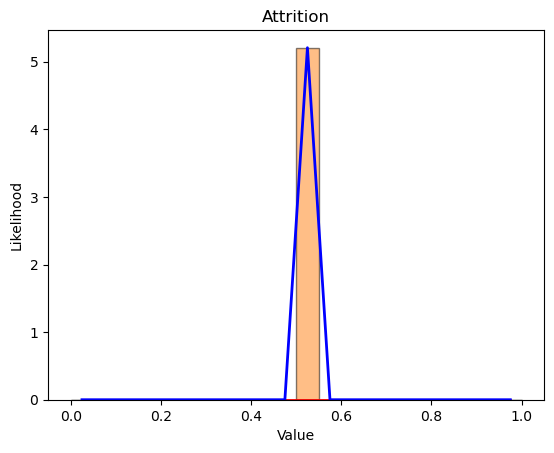

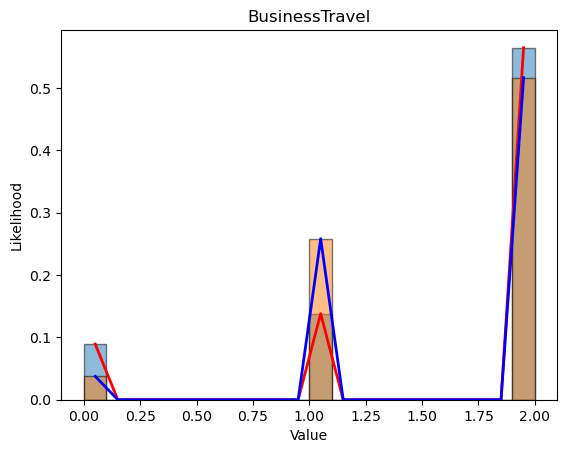

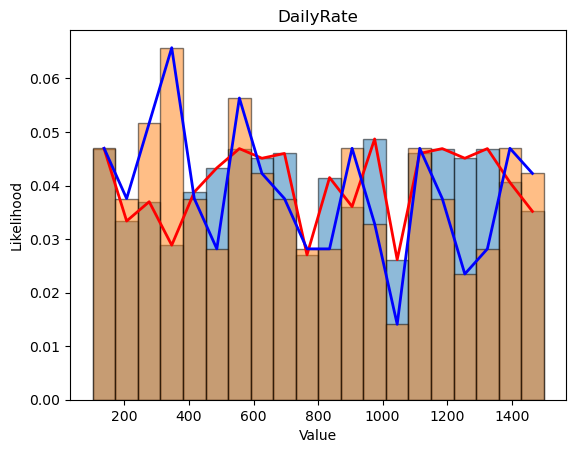

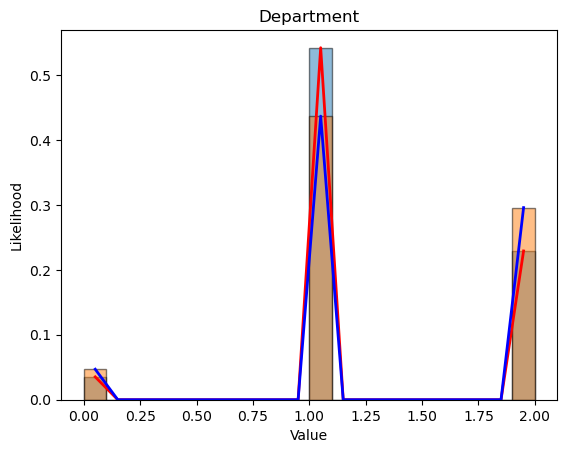

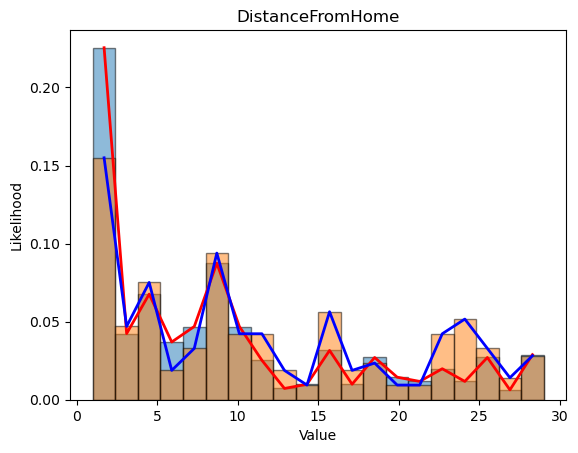

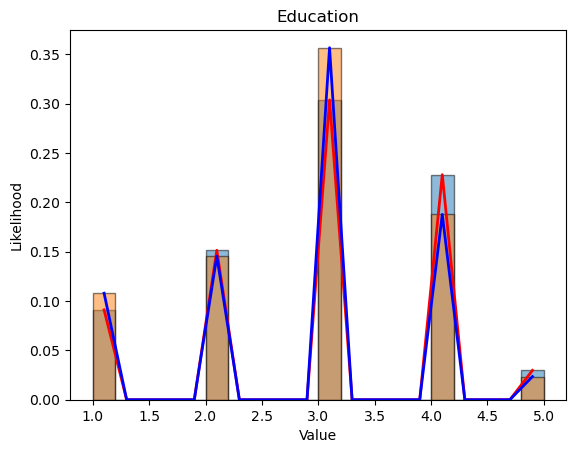

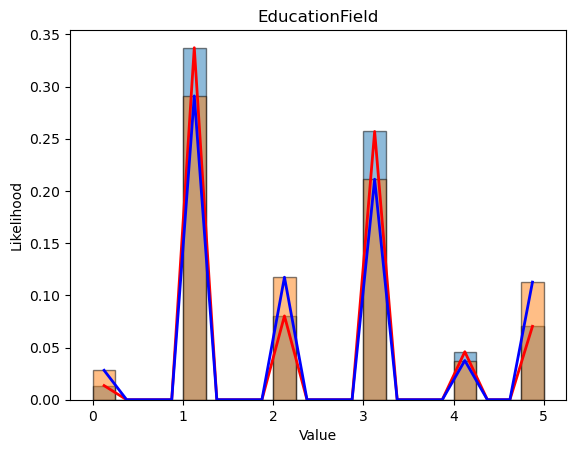

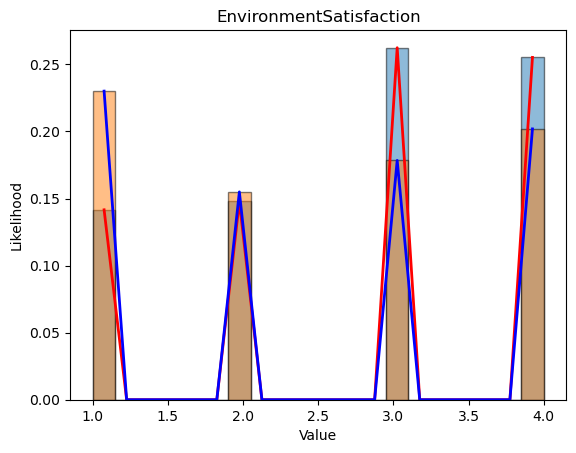

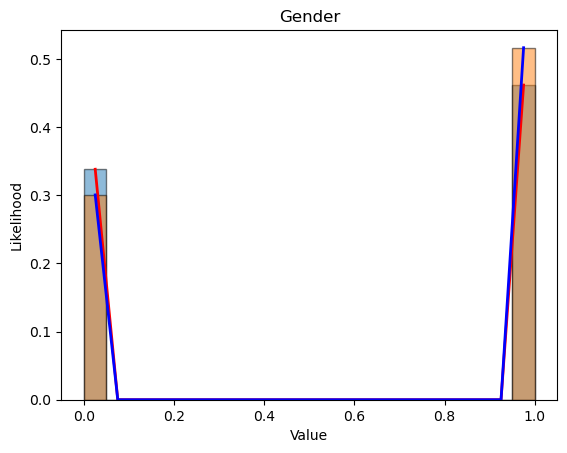

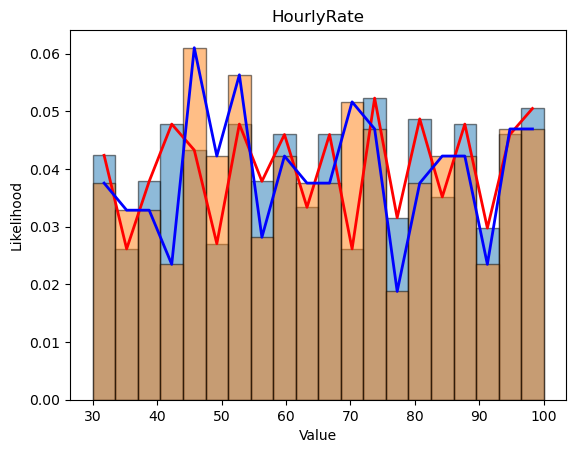

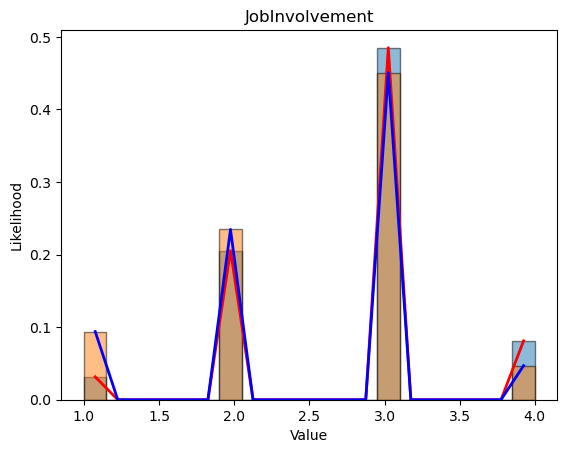

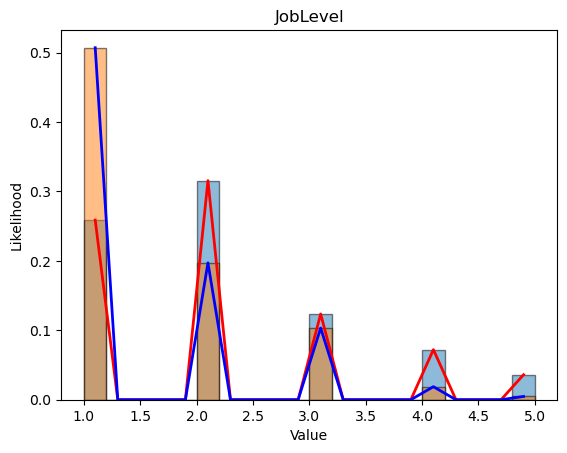

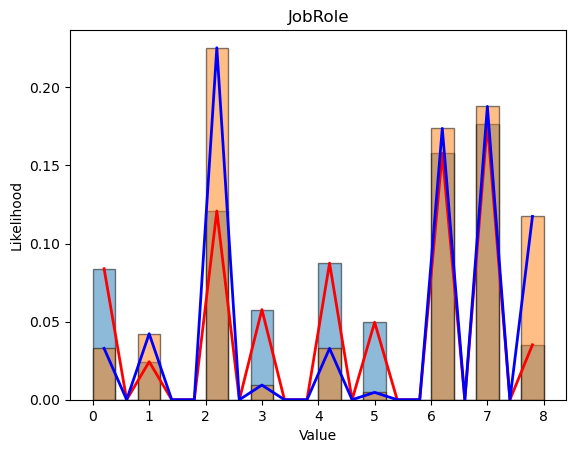

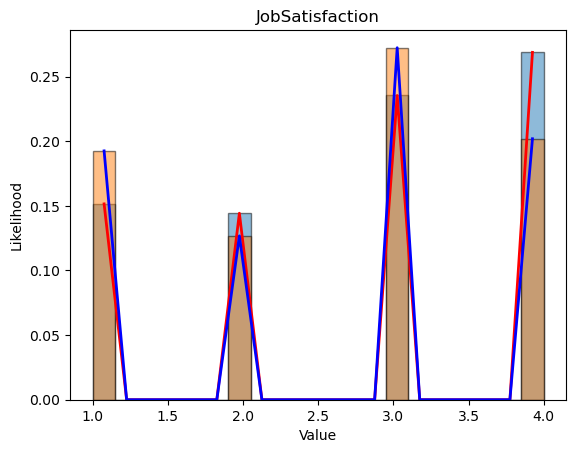

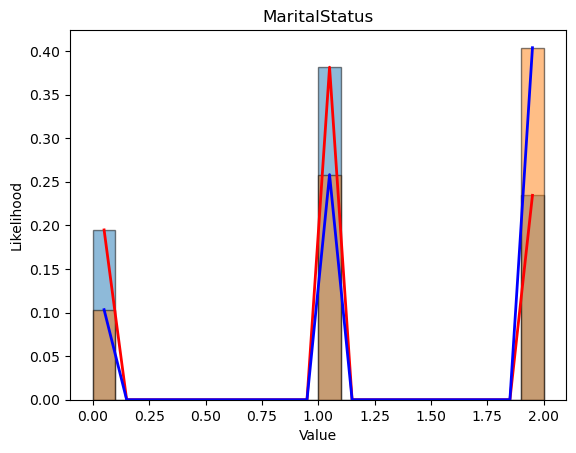

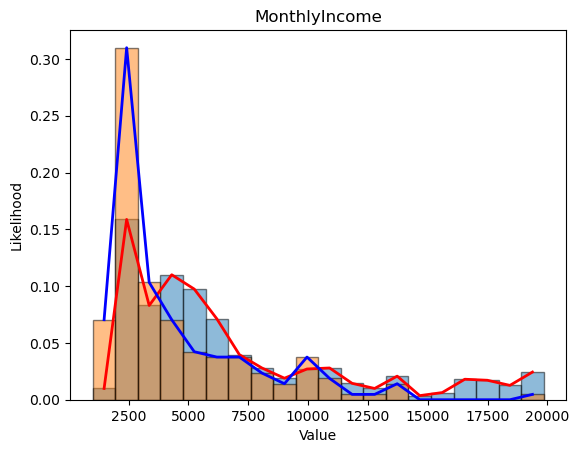

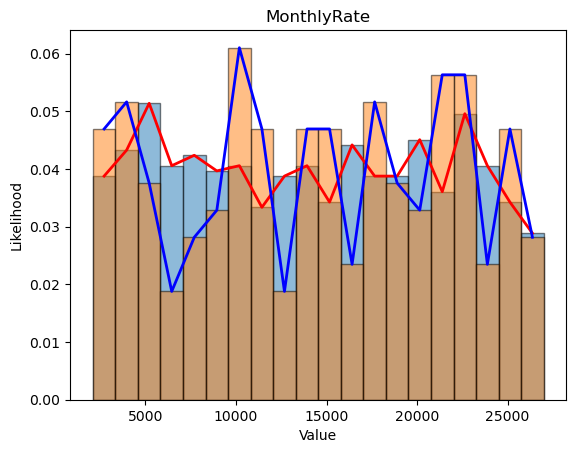

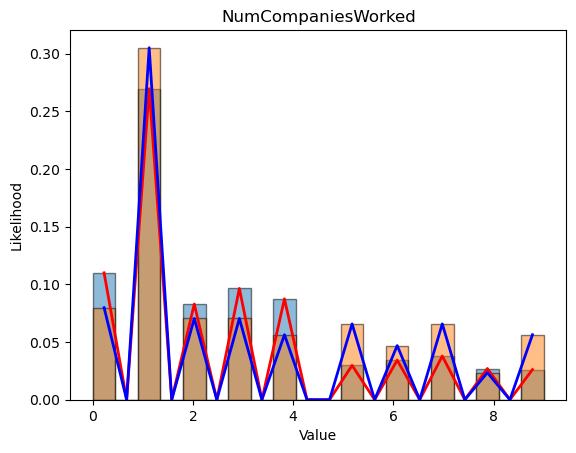

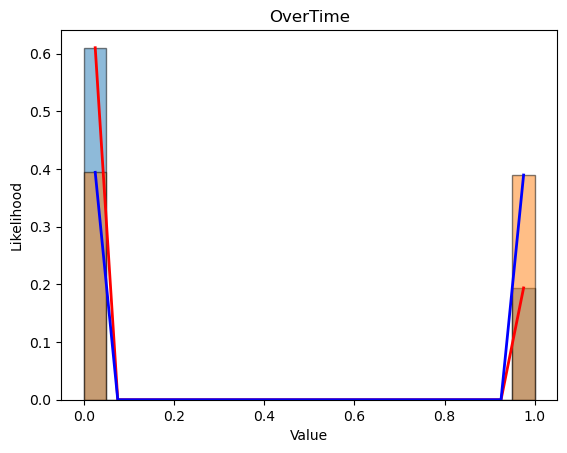

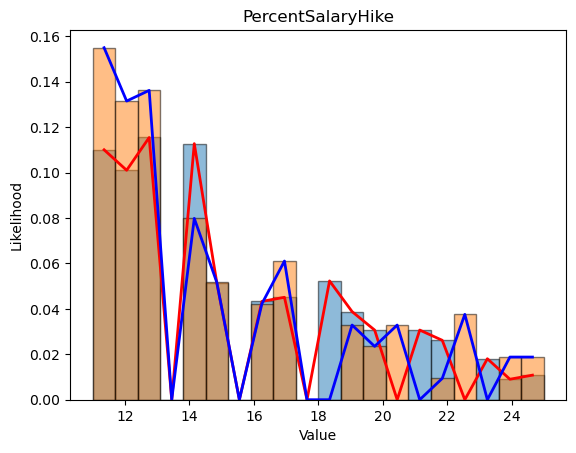

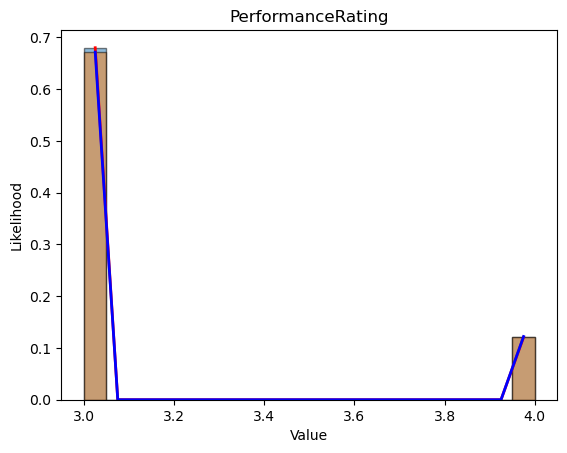

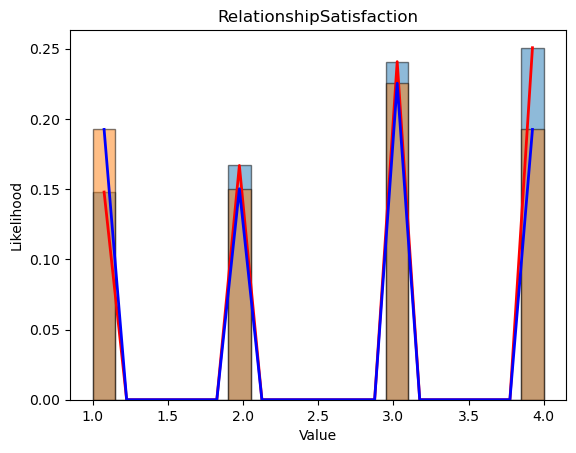

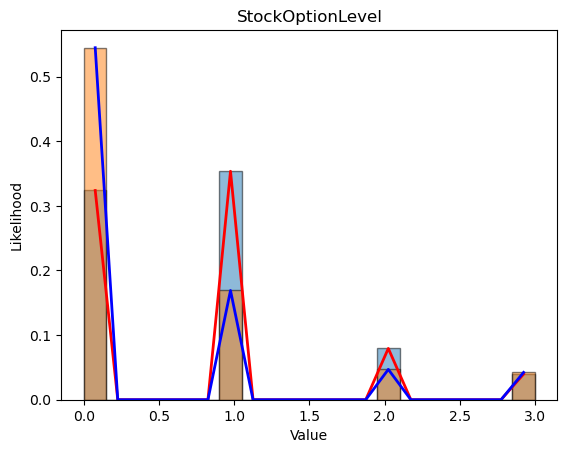

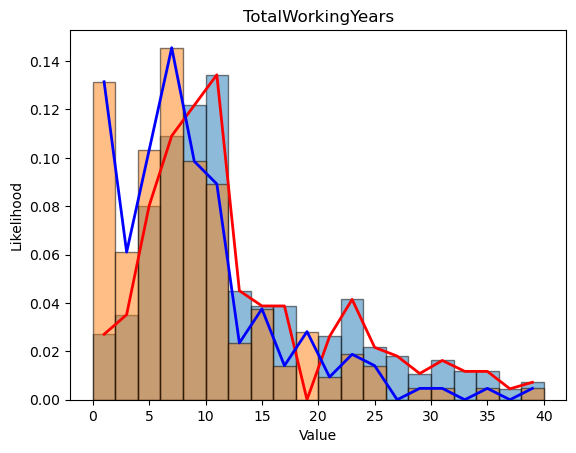

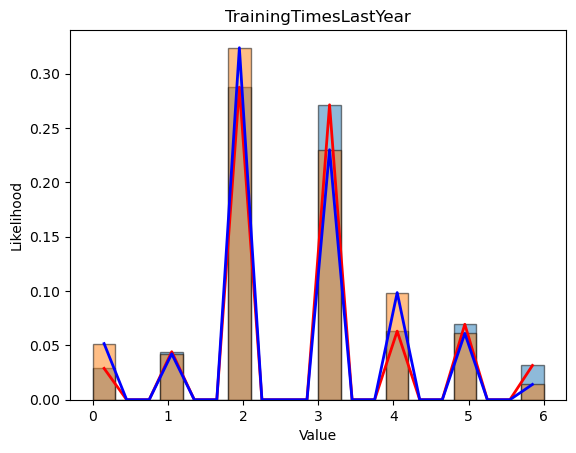

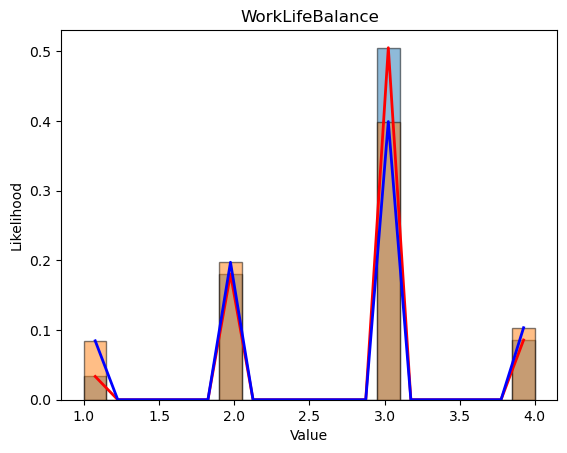

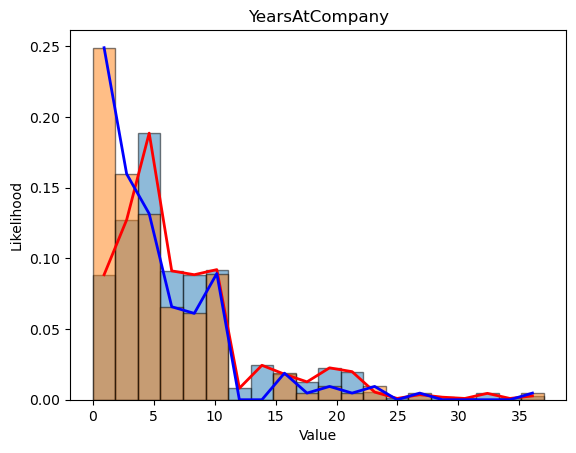

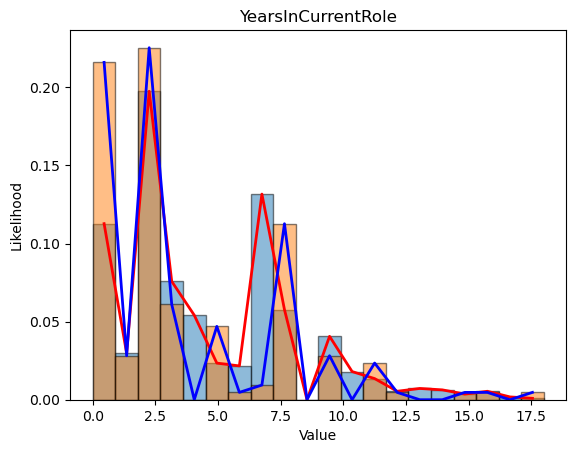

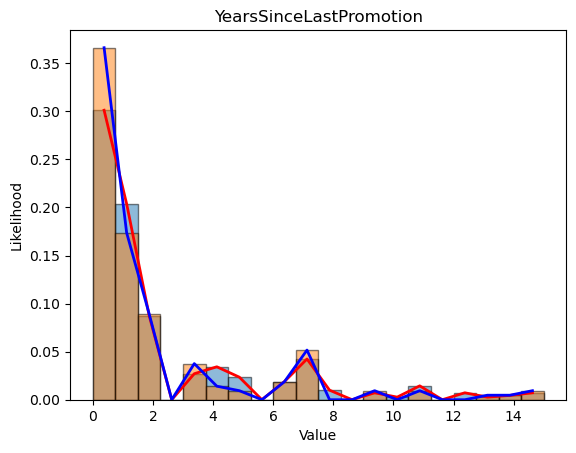

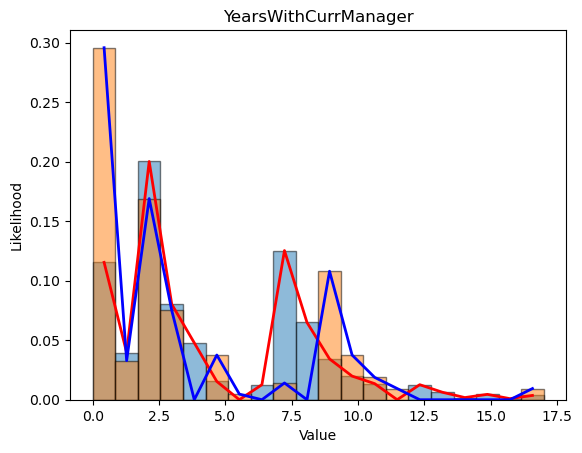

In [29]:
his_to_likely(train, n_bins = 20, plot = True)


----------------------- Naive Bayes classification ----------------------- 

### 2.6. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (xi|attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

Ans: เมื่อ probabilities มีค่าเท่ากับ 0 จะทำให้ได้ผลลัพธ์ที่ไม่มีที่สิ้นสุด (nan) ดังนั้นทางเราจึงเลือกแก้ปัญหานี้โดยการแทนที่ 0 ด้วยเลขที่มีค่าน้อยมากๆ เช่น 0.00001

### 2.7. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F1 score for detecting attrition.

In [30]:
y_true = np.array(test['Attrition'].copy())

In [31]:
test = test.drop(['Attrition'],axis =1)

In [32]:
test

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1339,NaN,2.0,391.0,1.0,7.0,NaN,1.0,4.0,NaN,75.0,...,NaN,1.0,NaN,NaN,2.0,3.0,NaN,0.0,0.0,0.0
2,37.0,NaN,1373.0,NaN,2.0,2.0,NaN,NaN,1.0,92.0,...,3.0,NaN,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
357,21.0,1.0,NaN,2.0,1.0,1.0,5.0,NaN,0.0,99.0,...,3.0,3.0,0.0,3.0,3.0,3.0,3.0,2.0,NaN,2.0
892,19.0,0.0,NaN,NaN,10.0,3.0,3.0,1.0,0.0,NaN,...,4.0,2.0,0.0,1.0,NaN,4.0,1.0,NaN,NaN,0.0
791,35.0,2.0,1204.0,2.0,4.0,NaN,NaN,4.0,1.0,86.0,...,4.0,1.0,0.0,9.0,2.0,3.0,8.0,7.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,27.0,2.0,1054.0,1.0,8.0,NaN,NaN,3.0,0.0,NaN,...,3.0,3.0,0.0,6.0,NaN,NaN,6.0,2.0,1.0,4.0
1311,18.0,0.0,1431.0,1.0,14.0,NaN,3.0,2.0,0.0,NaN,...,NaN,3.0,0.0,0.0,4.0,1.0,NaN,0.0,0.0,0.0
1355,36.0,2.0,335.0,2.0,17.0,2.0,2.0,3.0,1.0,NaN,...,3.0,3.0,2.0,12.0,1.0,1.0,4.0,2.0,1.0,NaN
1035,31.0,2.0,1398.0,NaN,8.0,2.0,3.0,4.0,0.0,96.0,...,3.0,4.0,0.0,NaN,3.0,3.0,3.0,2.0,0.0,2.0


In [33]:
from scipy.stats import norm

In [34]:
class naive_bayes_classifier:
    def __init__(self) -> None:
        self.prob_den = None
        self.prob_den_gauss = None
        self.n_bins = None
        self.bins = {}
        self.smooth = 0.000001

    def fit_his(self,data,out_class, n_bins):
        self.n_bins = n_bins
        self.p_1 = len(data.loc[data['Attrition'] == 1])/len(data)
        self.p_0 = len(data.loc[data['Attrition'] == 0])/len(data)

        prob_den = {}

        # for c in data['Attrition'].unique():
            # print(c)
            # sep_data = data.loc[data['Attrition'] == c]
            # print(sep_data)
        for col in data.columns:
            if col != 'Attrition':
                x = pd.DataFrame()
                
                x[col] = data[col]
                x['Attrition'] = data['Attrition']
                x = x.dropna()
                data_arr = np.array(data[col].dropna())  # Drop NaN Values
                _ , bin_edges = np.histogram(data_arr, n_bins) # count value in bin
                
                self.bins[col] = bin_edges

                x[col] = np.digitize(data_arr, bin_edges) # map value to bin
                x[col] = x[col].replace(21,20)
                # Calculate bin widths
                bin_widths = np.diff(bin_edges)
                
                prob_den[col] = {}
    
                for c in data['Attrition'].unique():
                    histogram_counts , _ = np.histogram(x[col].loc[x['Attrition'] == c], n_bins) # count value in bin
                    # Calculate probability densities
                    probability_densities = histogram_counts / len(data[col].loc[data['Attrition'] == c])
                    probability_densities = np.array(probability_densities)
                    probability_densities[probability_densities == 0] = self.smooth
                    # print(sum(probability_densities))
                    # Calculate bin centers
                    bin_centers = bin_edges[:-1] + bin_widths / 2
                    
                    bin_name = sorted(x[col].unique())
                    # print(len(probability_densities))
                
                    prob_den[col][c] = {}
                    for i in bin_name:
                        prob_den[col][c][i] = probability_densities[i-1]

        self.prob_den = prob_den

    def fit_prob_den(self,data):
        self.p_1 = len(data.loc[data['Attrition'] == 1])/len(data)
        self.p_0 = len(data.loc[data['Attrition'] == 0])/len(data)
        prob_den = {}
        for col in data.columns:
            if col != 'Attrition':
                fea = {}
                for c in data['Attrition'].unique():
                    sep_data = data.loc[data['Attrition'] == c]
                    sep_data = sep_data[col].dropna()
                    # arr_data = np.array(sep_data[col])
                    
                    mean = np.mean(sep_data)
                    std = np.std(sep_data)
                    nor_dis = norm(mean, std).pdf(sep_data)
                        
                    fea[c] = {'data':np.array(sep_data),'y':nor_dis}

                prob_den[col] = fea
        
        self.prob_den_gauss = prob_den
        
    def predict_his(self,data):
        result = []
        cols_name = data.columns
        arr_data = np.array(data)
        for row in arr_data:
            prob_den_yes = 1
            prob_den_no  = 1
            ll_ratio = 1
            for ind, d in enumerate(row):
                if np.isnan(d):
                    pass
                else:
                    re = np.digitize(d, self.bins[cols_name[ind]]) # map data to each bin
                    # print(re)
                    if re > self.n_bins:
                        re = self.n_bins
                    elif re < 1:
                        re = 1
                    if re not in self.prob_den[cols_name[ind]][1].keys():
                        prob_den_yes = self.smooth
                    else:
                        prob_den_yes = self.prob_den[cols_name[ind]][1][re]

                    if re not in self.prob_den[cols_name[ind]][0].keys():
                        prob_den_no = self.smooth
                    else:
                        prob_den_no = self.prob_den[cols_name[ind]][0][re]
                        # print(prob_den_yes, prob_den_no)

                    ll_ratio *= prob_den_yes/prob_den_no

            decis = (self.p_1/self.p_0)*ll_ratio
            if decis >= 1:
                result.append(1)      
            elif decis < 1: 
                result.append(0)      
                
        return np.array(result)
    
    def pred_prob_den(self,data):
        result = []
        cols_name = data.columns
        arr_data = np.array(data)
        for row in arr_data:
            ll_ratio = 1
            for ind, d in enumerate(row):
                if np.isnan(d):
                    pass
                else:
                    prob_den_yes = np.interp(d, self.prob_den_gauss[cols_name[ind]][1]["data"], self.prob_den_gauss[cols_name[ind]][1]["y"].flatten())
                    prob_den_no = np.interp(d, self.prob_den_gauss[cols_name[ind]][0]["data"], self.prob_den_gauss[cols_name[ind]][0]["y"].flatten())
                    
                    ll_ratio *= prob_den_yes/prob_den_no
                    
            decis = (self.p_1/self.p_0)*ll_ratio
            # print(decis)
            if decis >= 1:
                result.append(1)      
            elif decis < 1: 
                result.append(0)      
                
        return np.array(result)

In [35]:
from sklearn.metrics import classification_report

In [36]:
nb = naive_bayes_classifier()
nb.fit_his(train, 'Attrition', n_bins= 20)
# print(nb.prob_den.keys())
y_pred = nb.predict_his(test)

In [37]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       124
           1       0.31      0.33      0.32        24

    accuracy                           0.77       148
   macro avg       0.59      0.59      0.59       148
weighted avg       0.78      0.77      0.77       148



### 2.8. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.

In [38]:
nb_gauss = naive_bayes_classifier()
nb_gauss.fit_prob_den(train)
# print(nb_gauss.prob_den_gauss)
y_pred = nb_gauss.pred_prob_den(test)

In [39]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       124
           1       0.35      0.25      0.29        24

    accuracy                           0.80       148
   macro avg       0.61      0.58      0.59       148
weighted avg       0.78      0.80      0.79       148



Ans: จากการทดลองใช้วิธีการประมาณค่าทั้งสองแบบ พบว่าทั้งสองวิธีมีผลลัพธ์ที่ใกล้เคียงกัน โดยสามารถทำนายข้อมูลที่เป็นคลาส 0 ได้ดีกว่าคลาส 1  เนื่องจากในชุดข้อมูลนี้มีความไม่สมดุลของข้อมูลอยู่ โดยมีคลาส 0 มากกว่า คลาส 1 ในชุดข้อมูลทดสอบ ซึ่งส่งผลกระทบโดยตรงต่อผลลัพธ์